In [107]:
def get_directory_file_names(regex):
    import os
    import re
    
    current_directory = os.getcwd()
    list_files = os.listdir(current_directory)
    
    return re.findall(regex, str(list_files))
  

In [108]:
regex = r'\w+_\d+\.mat'
file_names_normal = get_directory_file_names(r'normal_\d+\.mat')
file_names_12k = get_directory_file_names(r'\w+_\d+\.mat')

In [109]:
# loading the data
def load_data(file_names):
    
    import scipy.io    
    
    file_data = []
    
    for name in file_names:
        data = scipy.io.loadmat(name)  
        file_data.append(data)

    return file_data


data_normal = load_data(file_names_normal)
data_12k = load_data(file_names_12k)

# for i in range(len(data_normal)):
#     print(data_normal[i].keys())

In [110]:
# Gets the titles of useful data for analysis and return the list of titles
def get_titles_dataset(dataset, pattern = r"X\d{3}_\w{2}_\w+"):
    
    import re
    from itertools import chain

    titles = []
    for data in dataset:
        keys = str(data.keys())
        match = re.findall(pattern, keys)
        titles.append(match)    

    list_of_title = list(chain.from_iterable(titles))

    # return the list with repeated titles removed
    return list(set(list_of_title))
    

In [111]:
# extracting the titles from each dataset
data_titles_normal = get_titles_dataset(data_normal)
data_titles_12k = get_titles_dataset(data_12k)

# data_titles_normal

In [112]:
# creates a DataFrame with all data related to titles
def get_data_by_title(dataset, titles, sample_size=512):
    
    import pandas as pd       
  
    series = []
    for name in titles:
        for data in dataset:
           if name in data.keys():
               data_named = pd.Series(data[name][:sample_size].reshape(-1), name=name)
               series.append(data_named)

    return pd.DataFrame(series).T;
    

In [113]:
# creating samples with a specific size
sample_normal = get_data_by_title(data_normal, data_titles_normal, sample_size=512)
sample_12k = get_data_by_title(data_12k, data_titles_12k, sample_size=512)

# sample_normal.head()


In [114]:
# plots using the scatter plot
def plot_sample(sample_data, xlabel='time (ms)', ylabel='amplitude'):
    
    import matplotlib.pyplot as plt
    import numpy as np
    
    for title, data in sample_data.items():        
        plt.figure(figsize=(25,8))
        plt.plot(np.arange(len(data)), data)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.show()


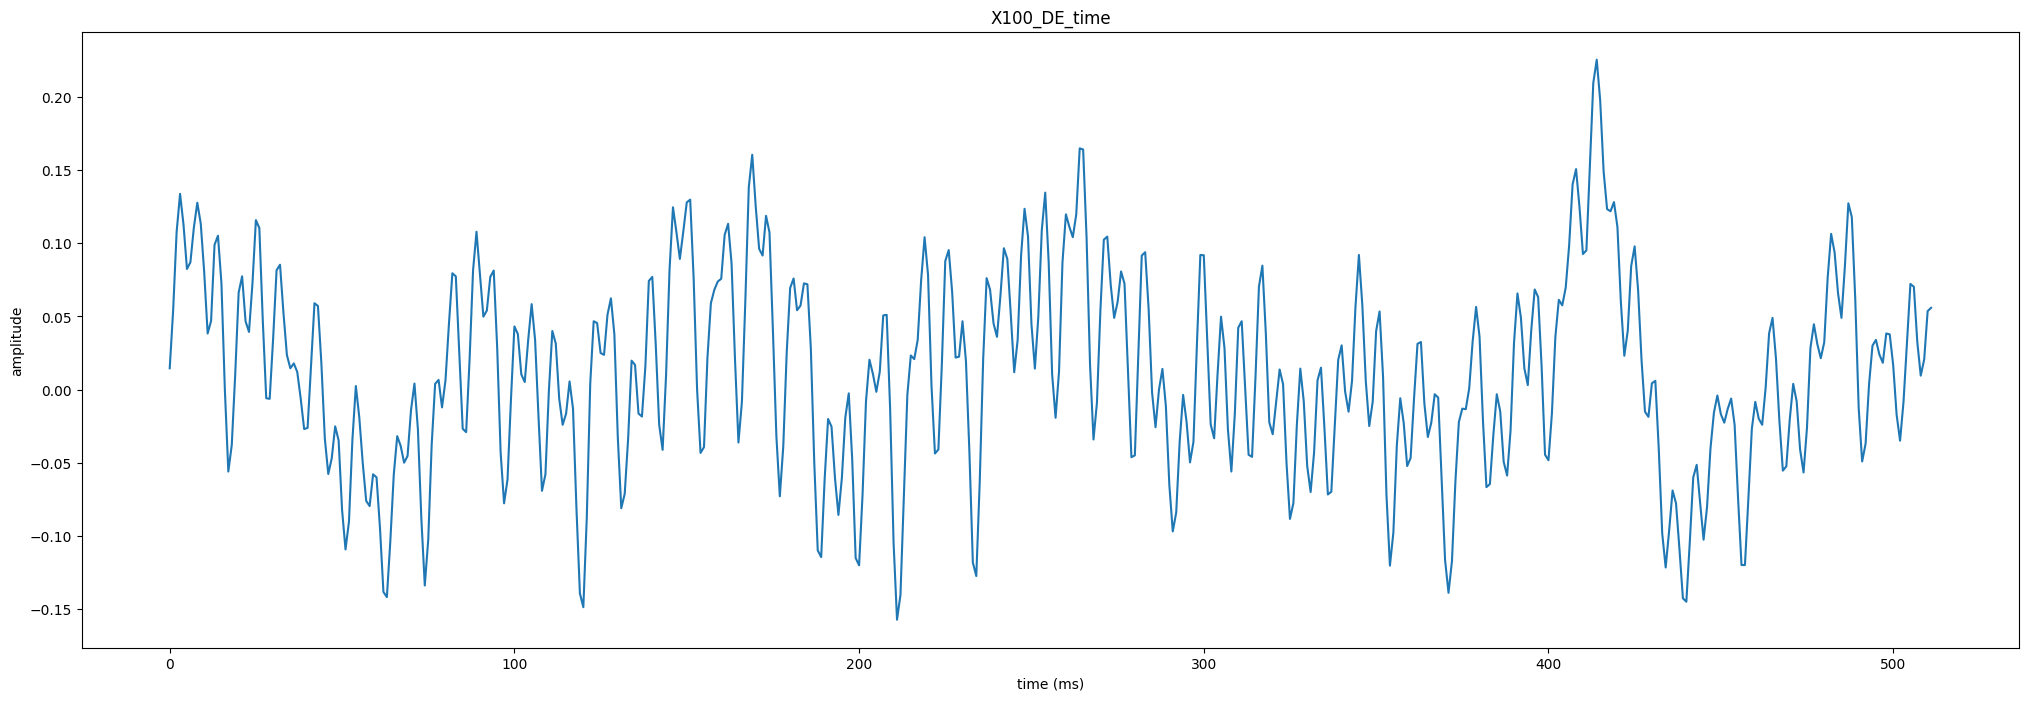

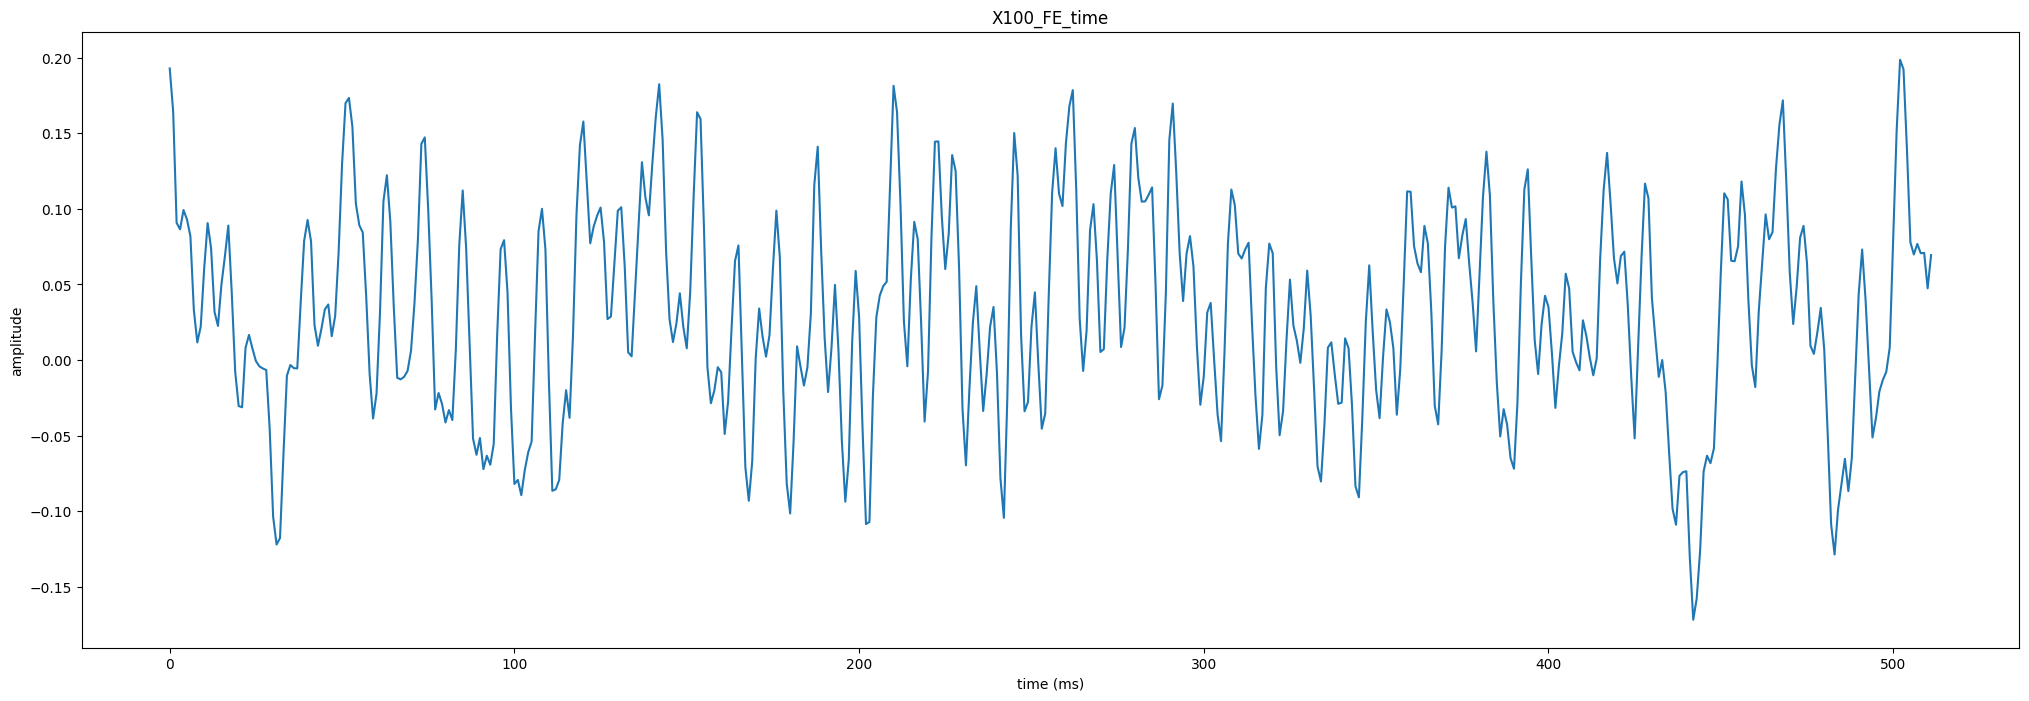

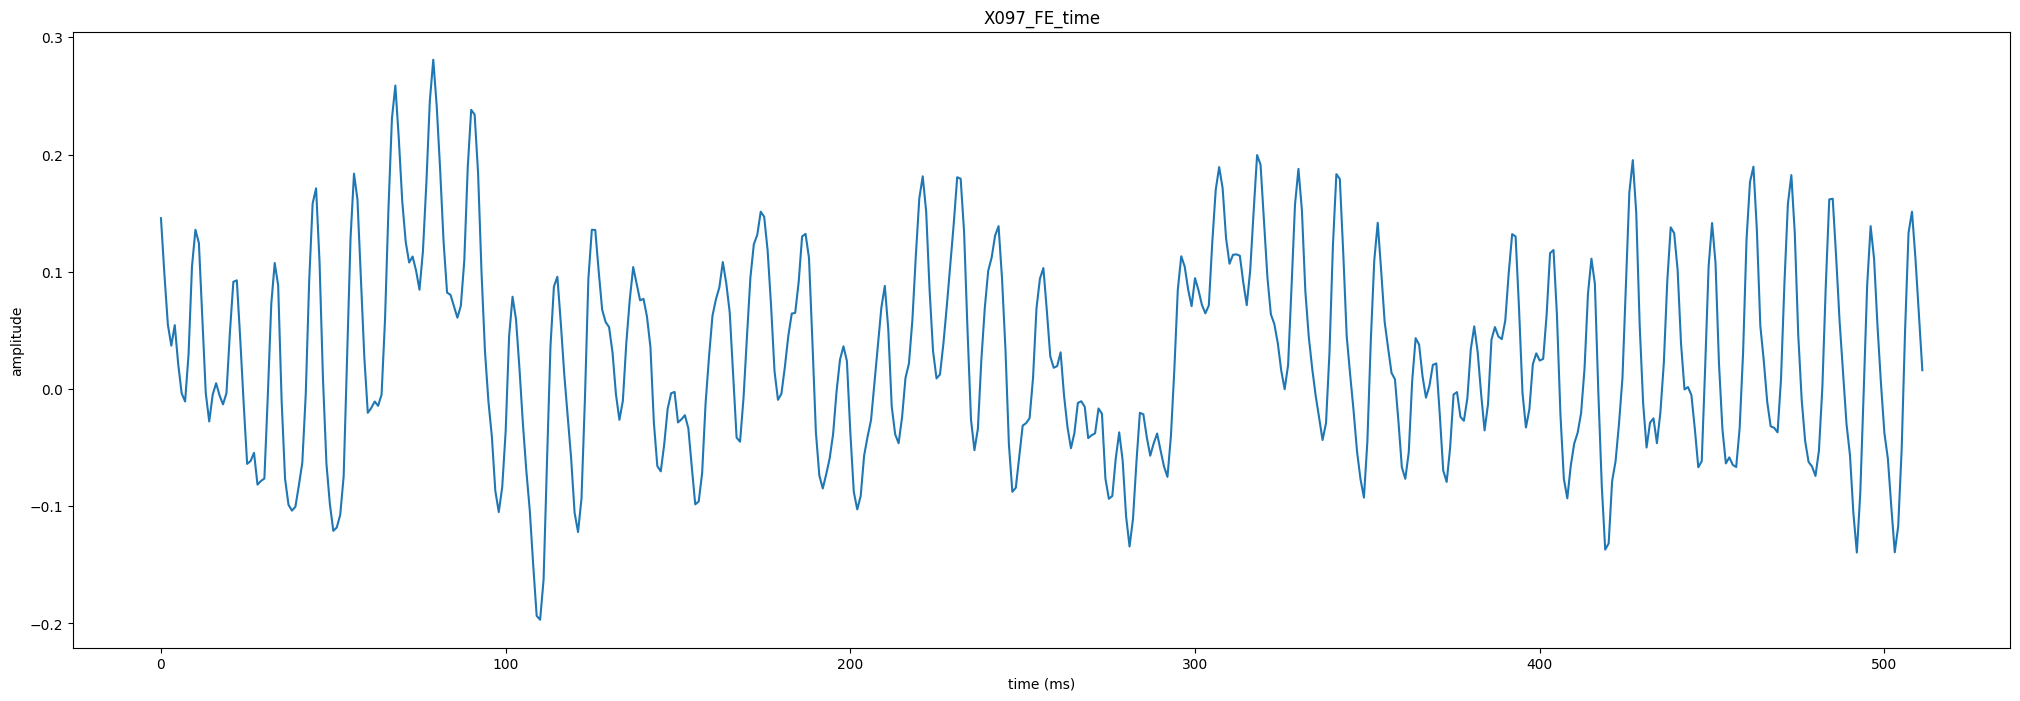

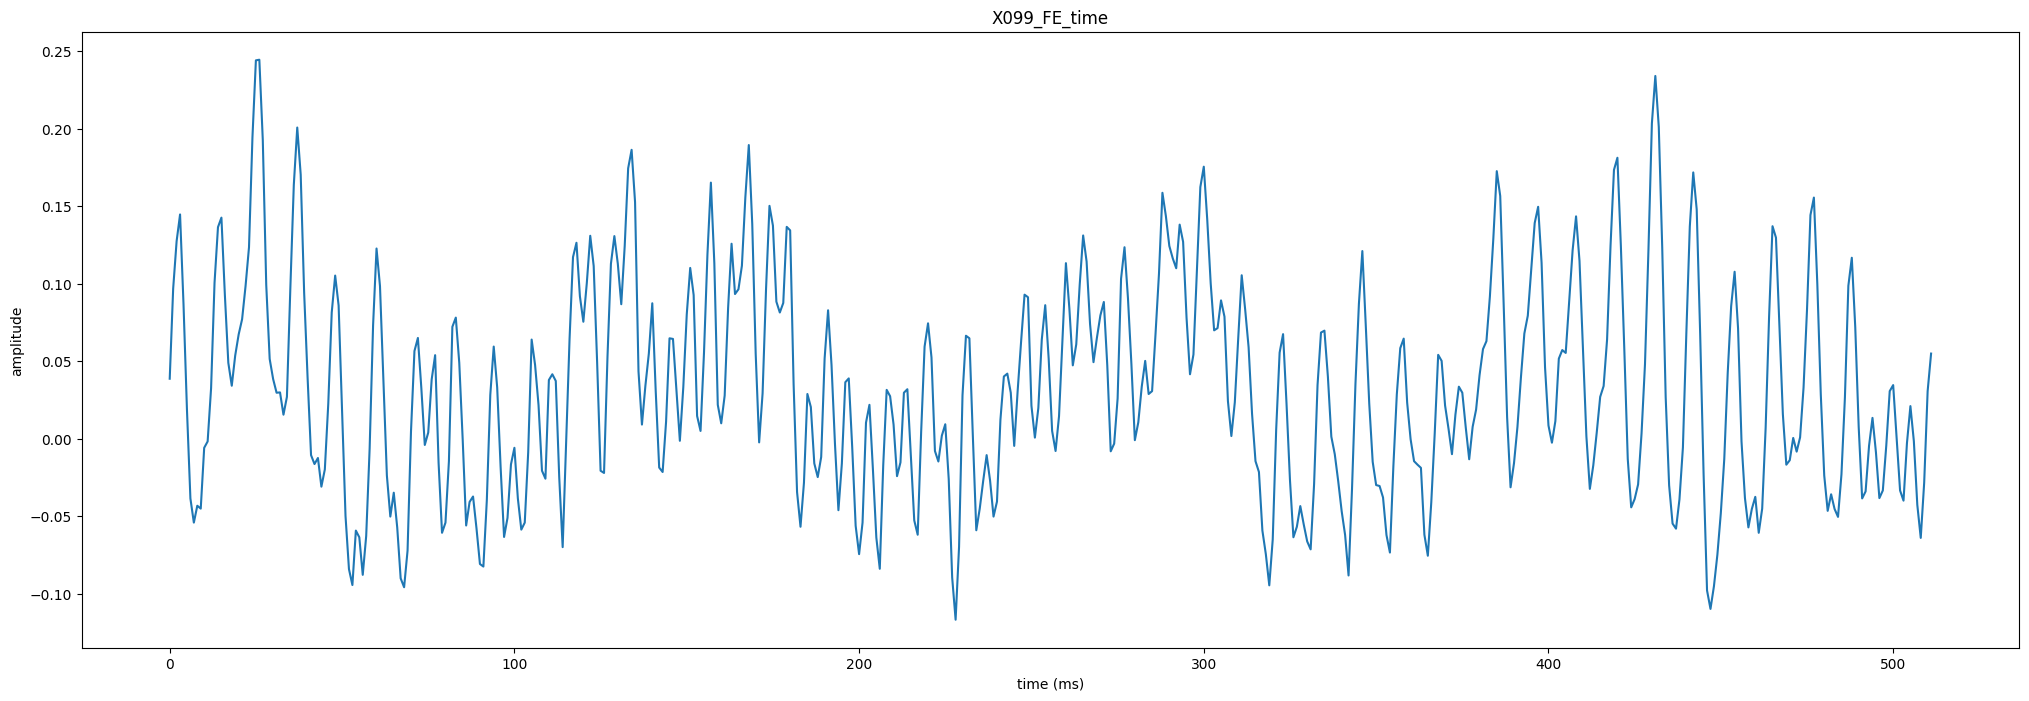

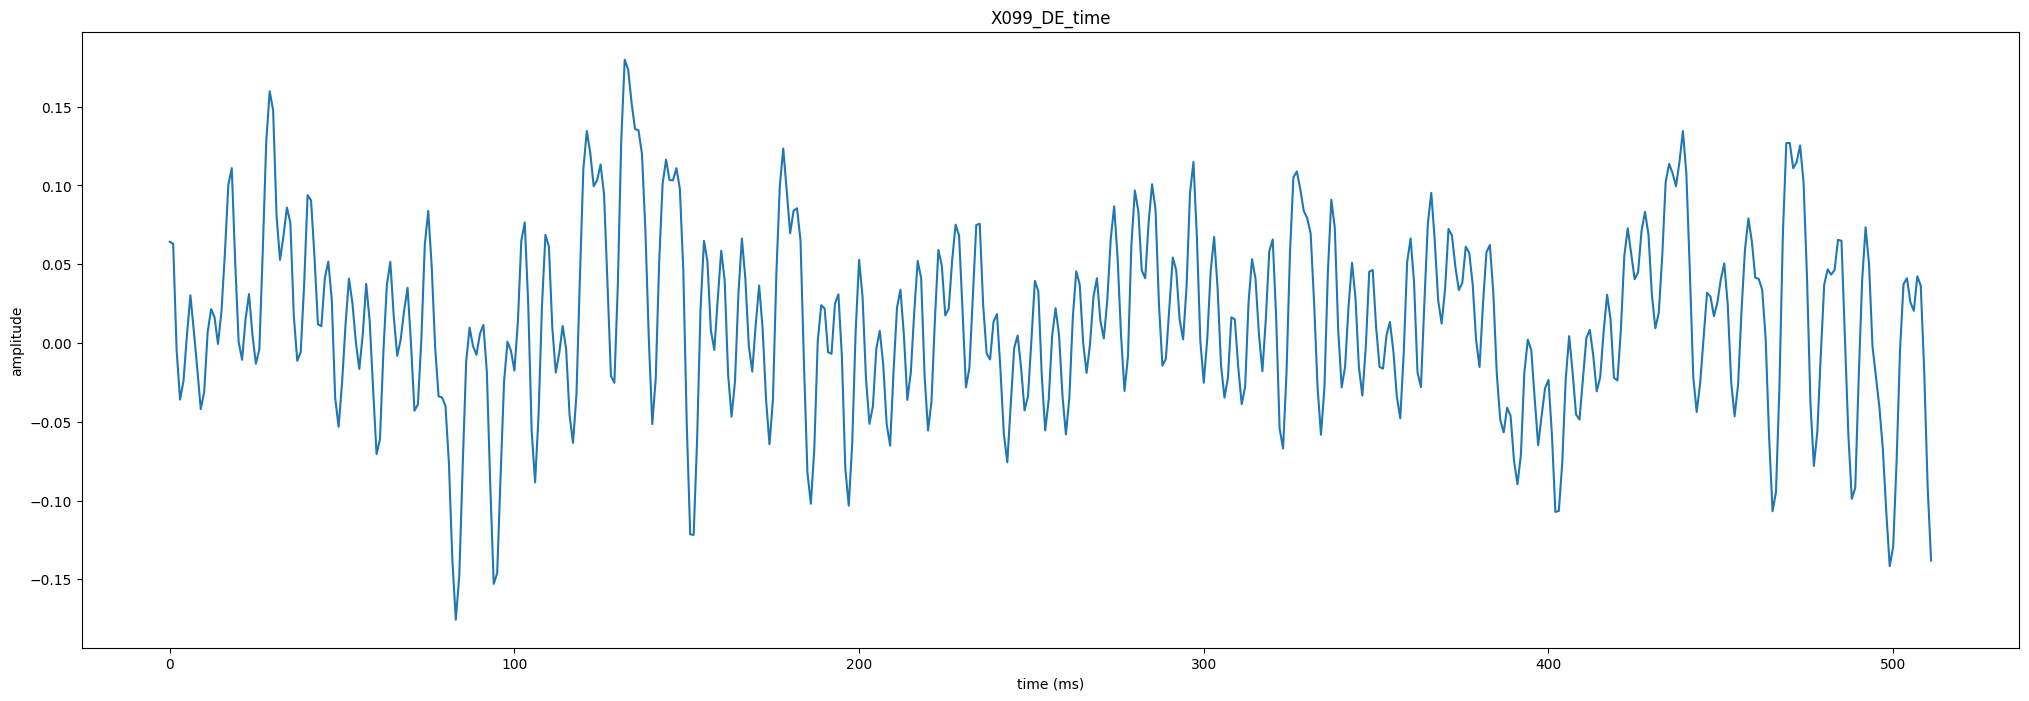

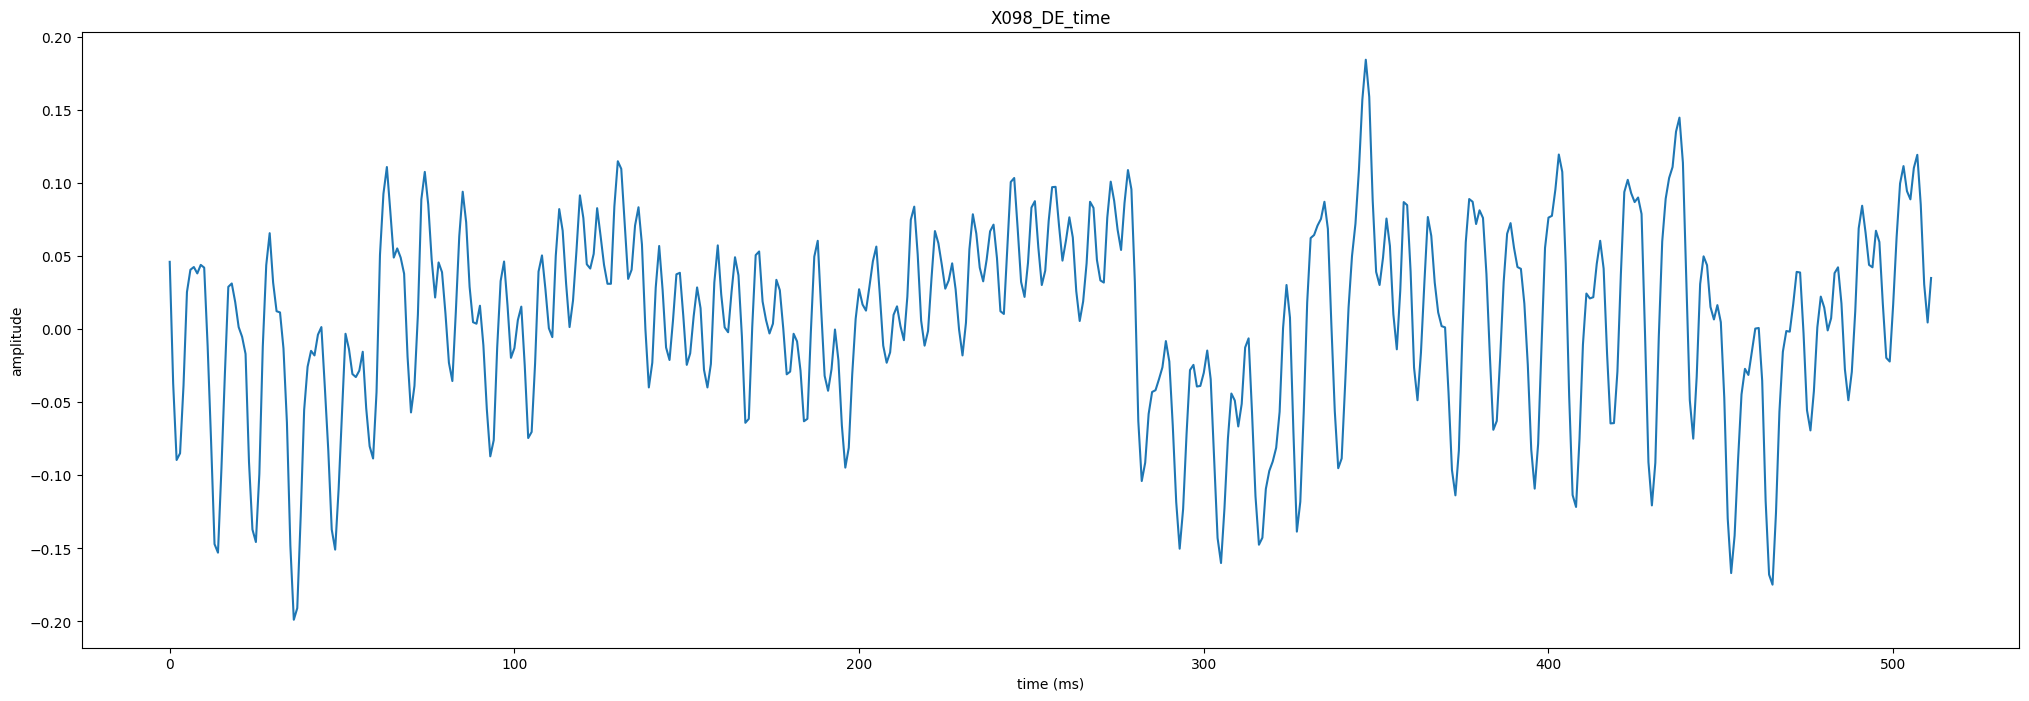

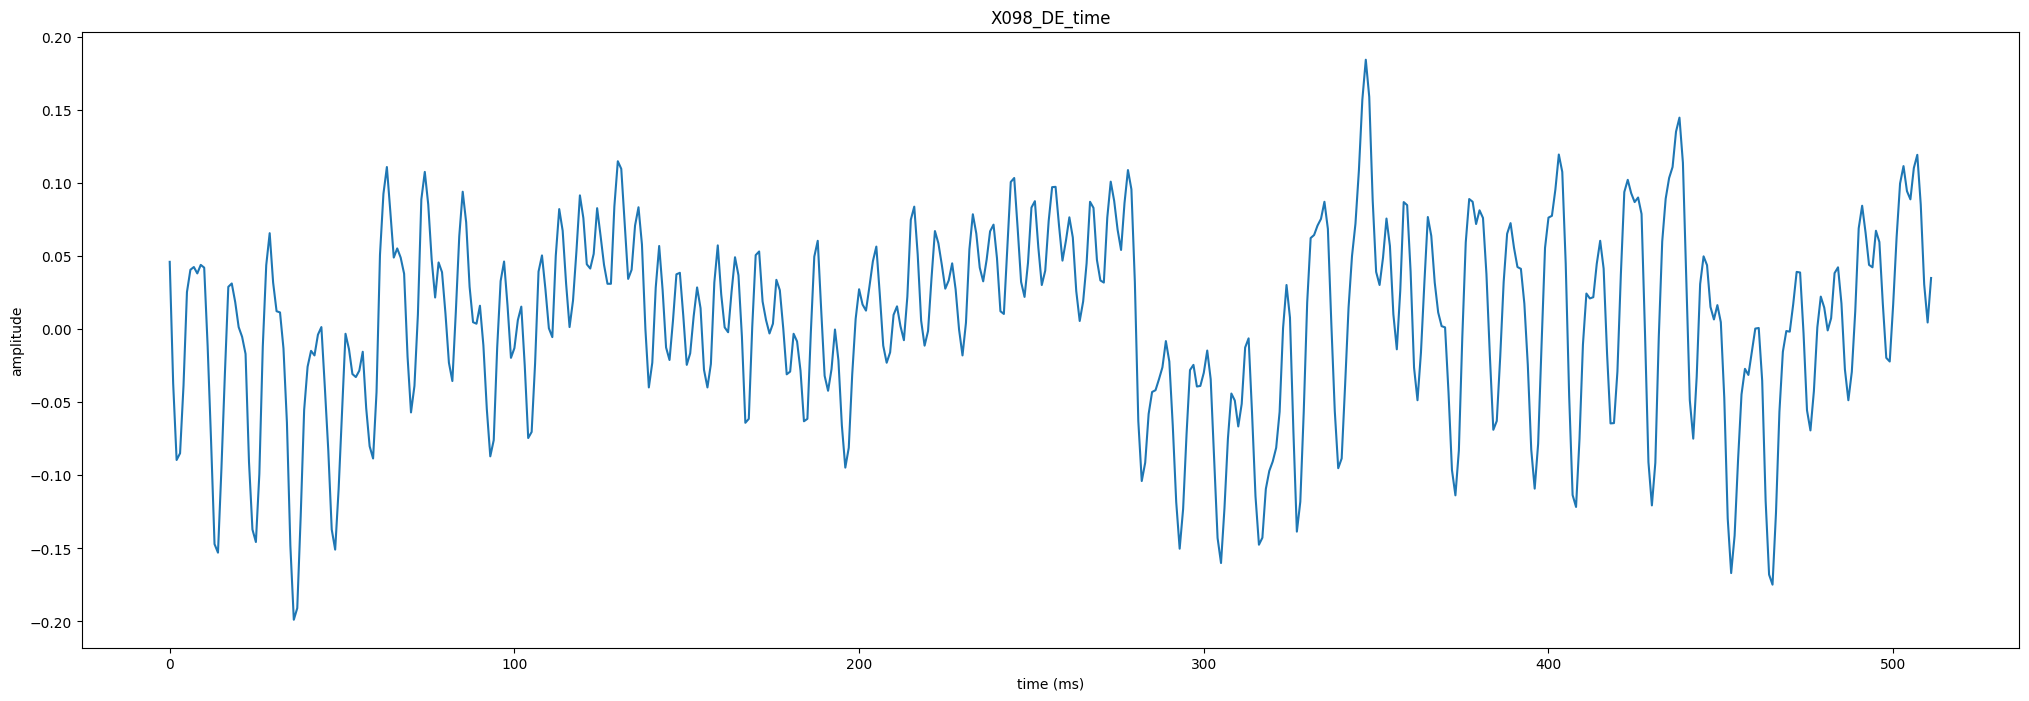

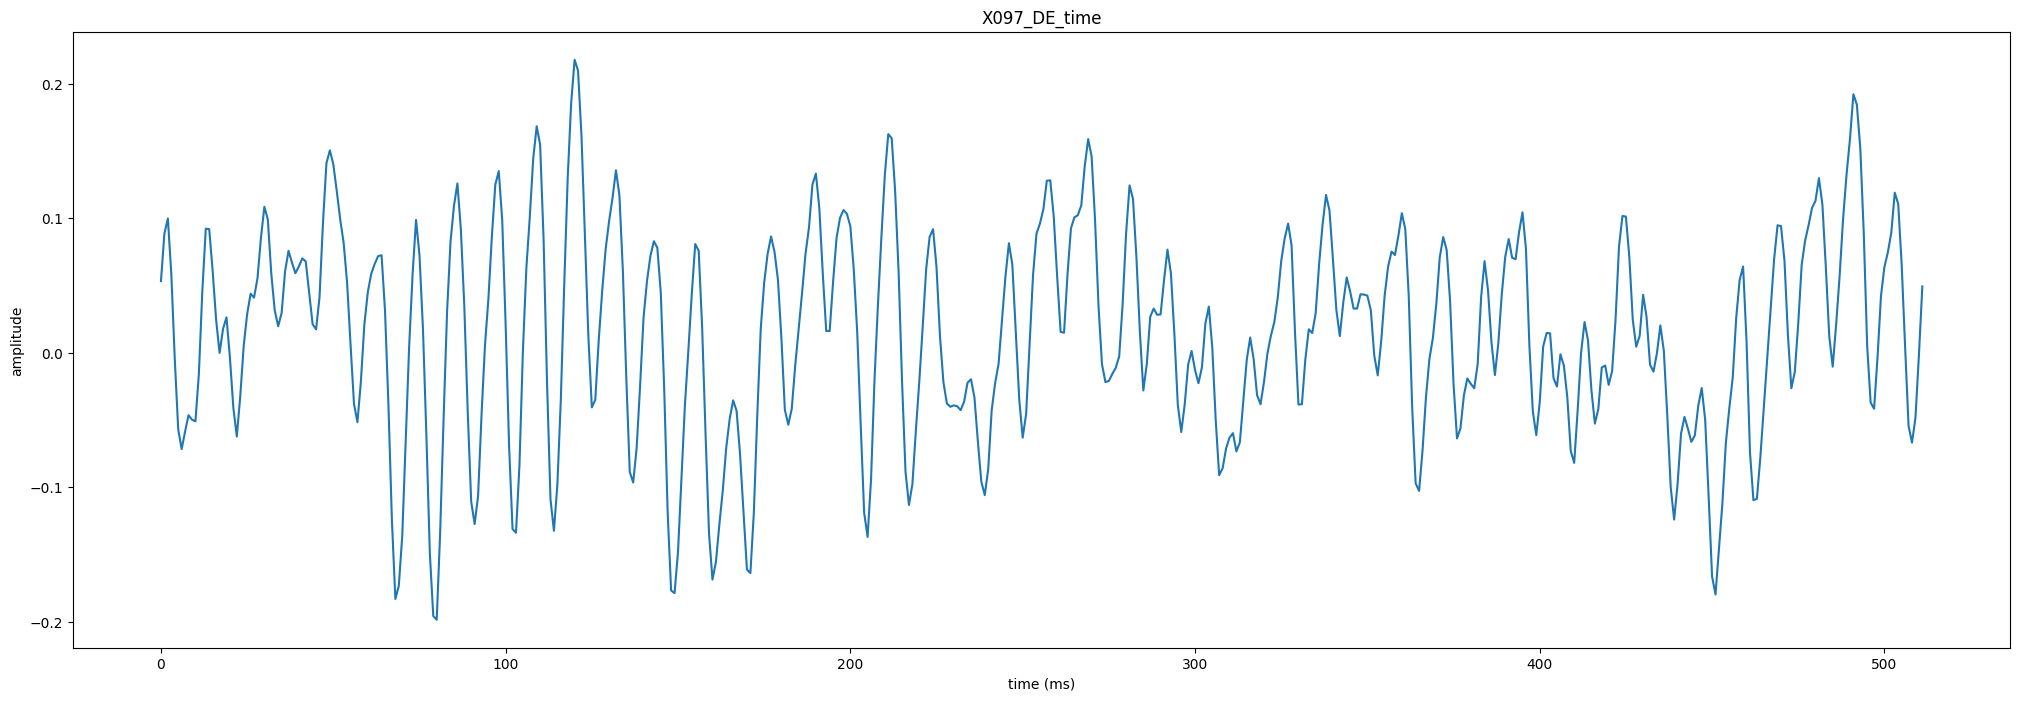

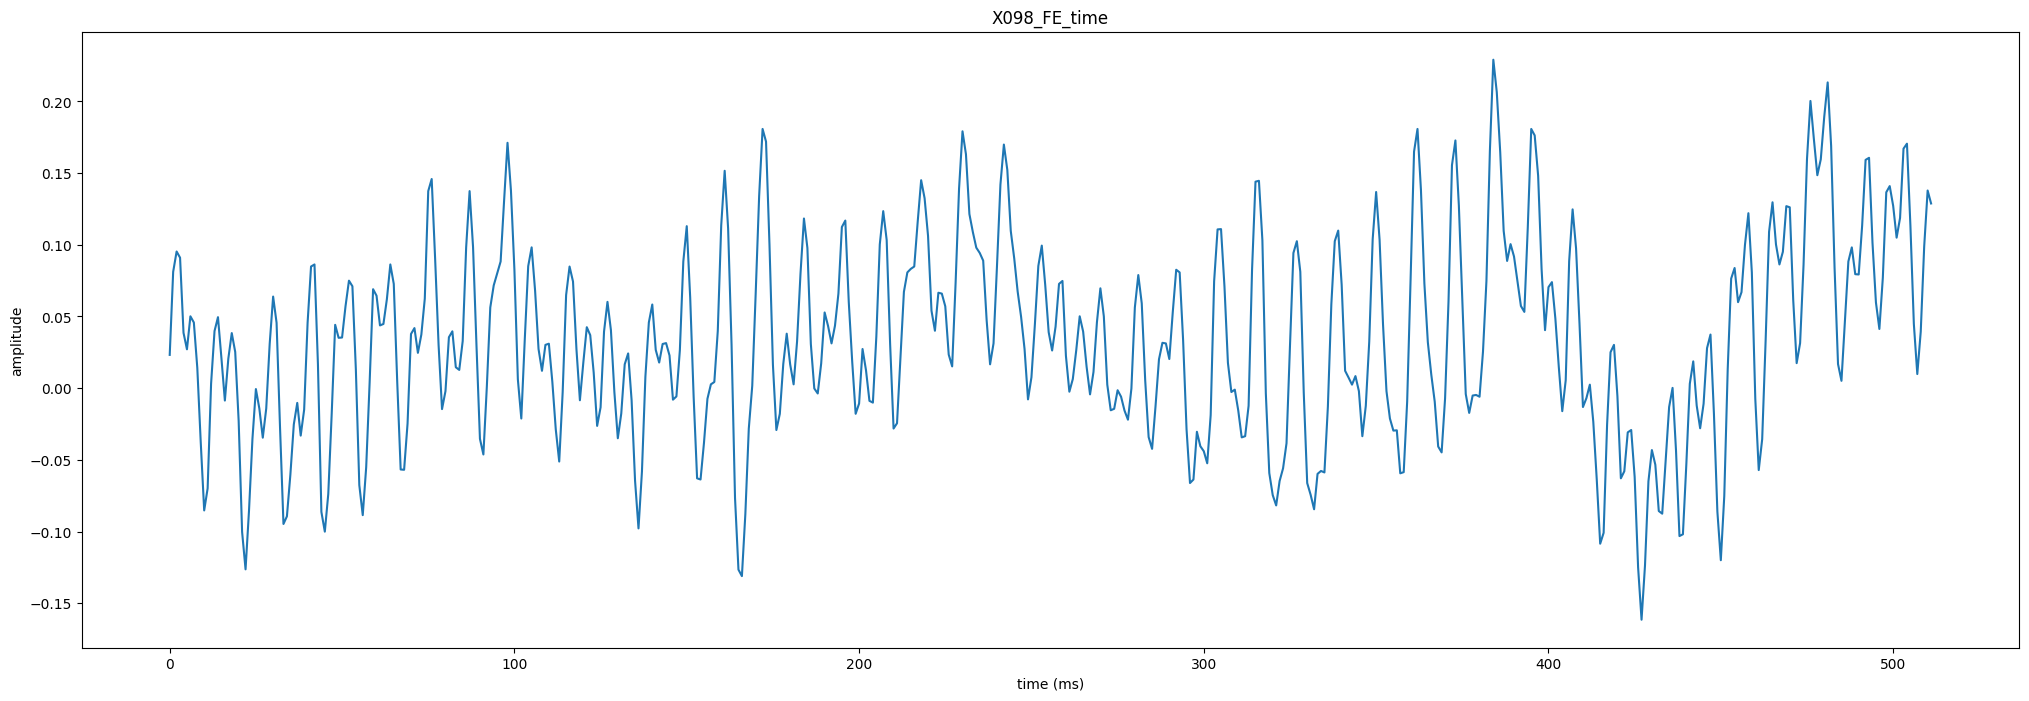

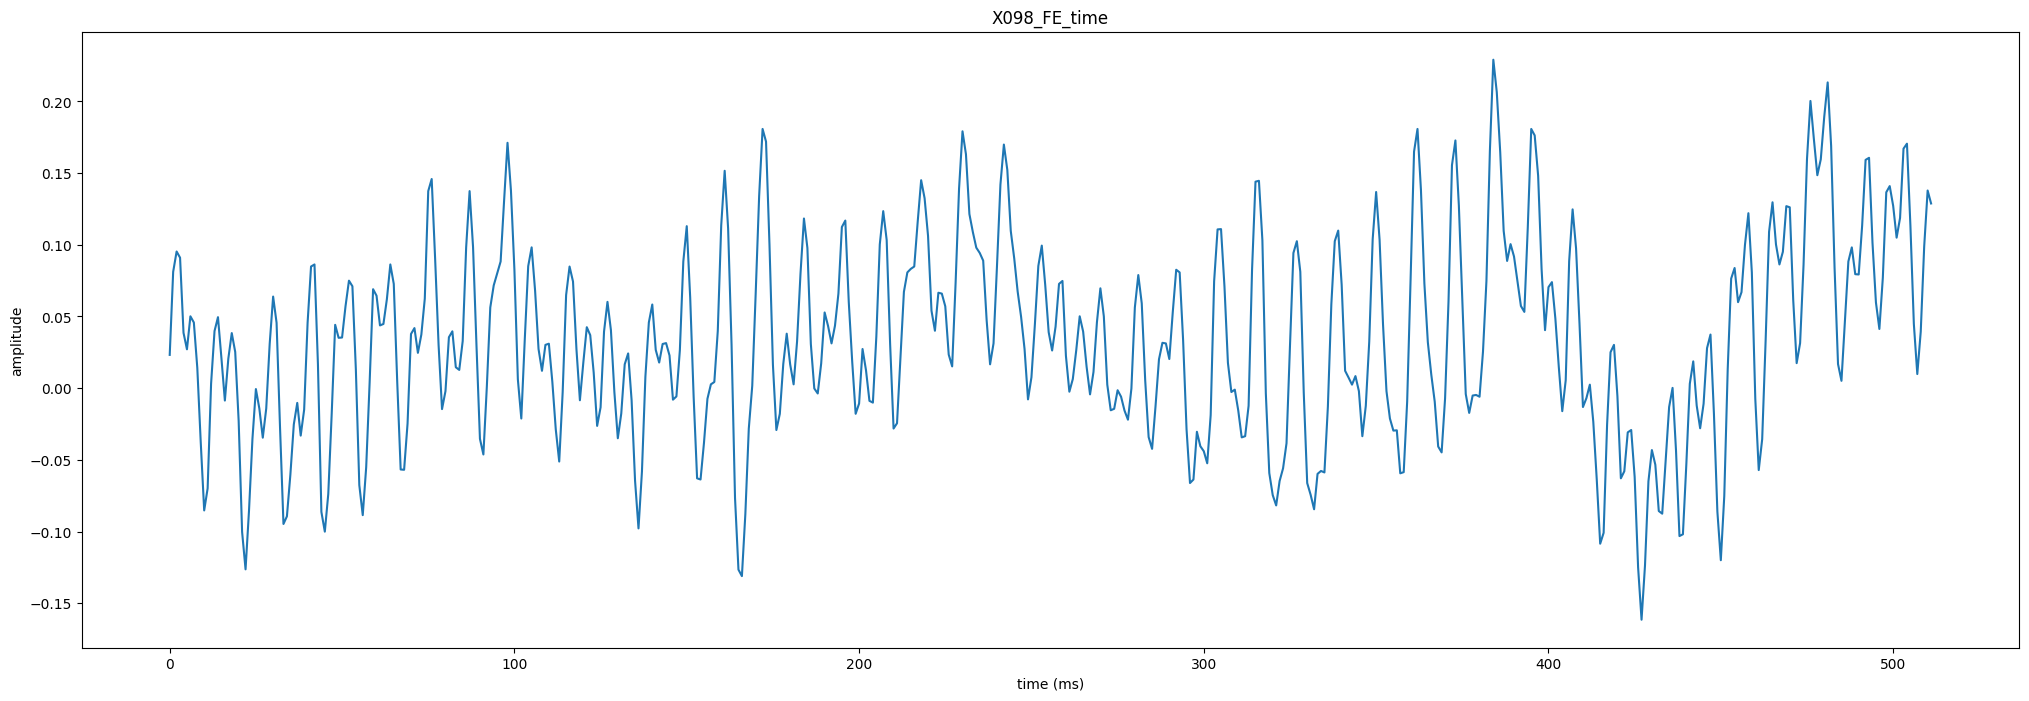

In [115]:
# plotting using nomal_data
plot_sample(sample_normal)

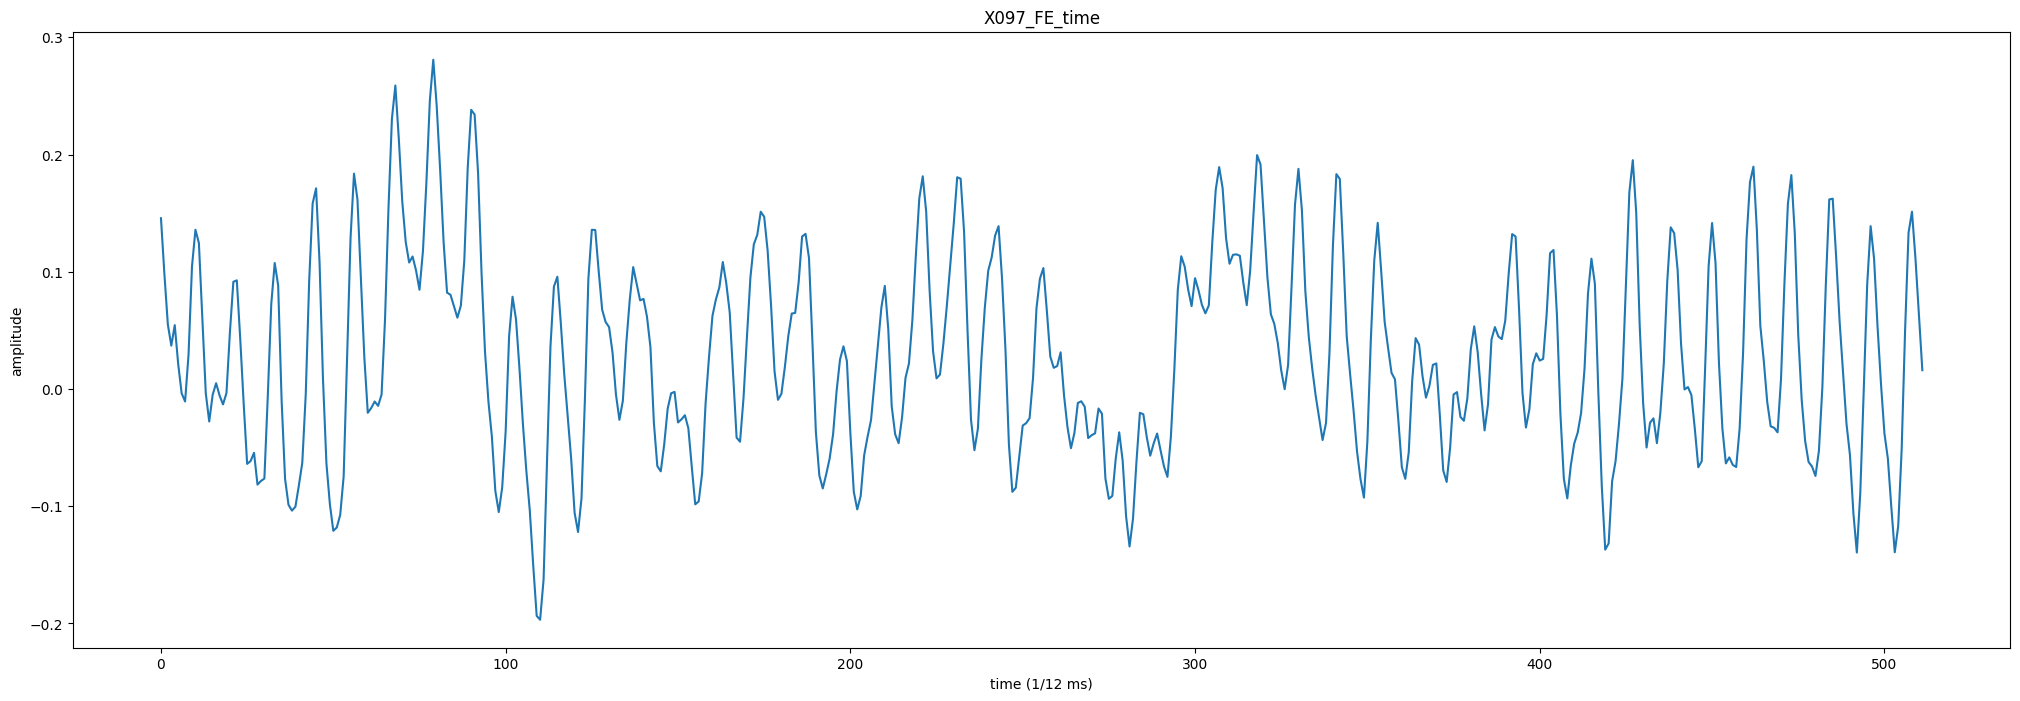

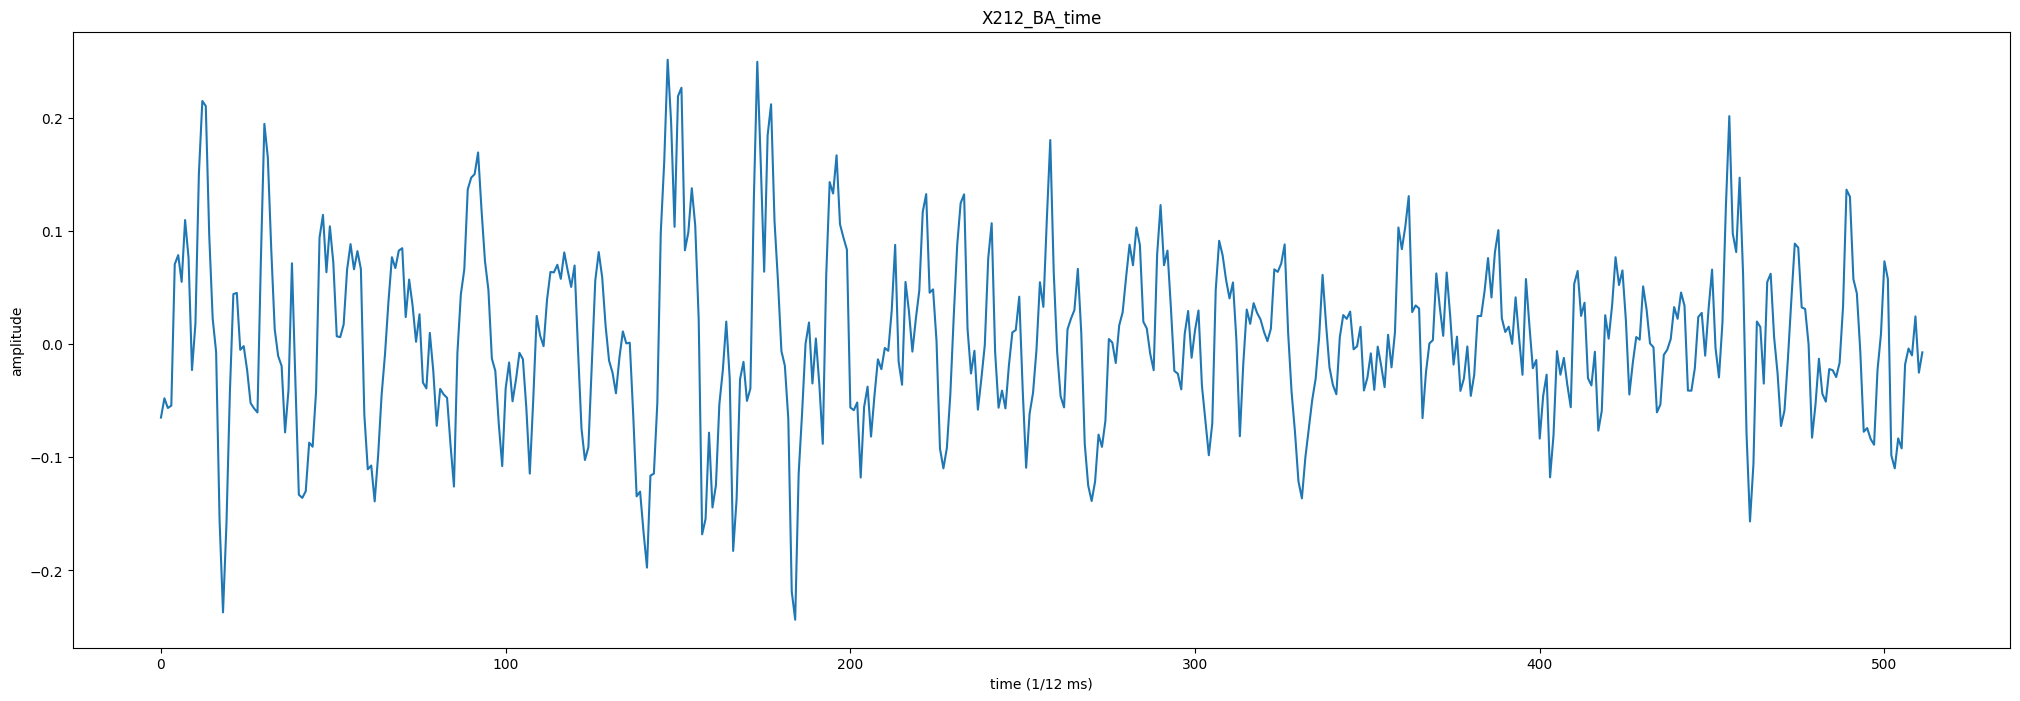

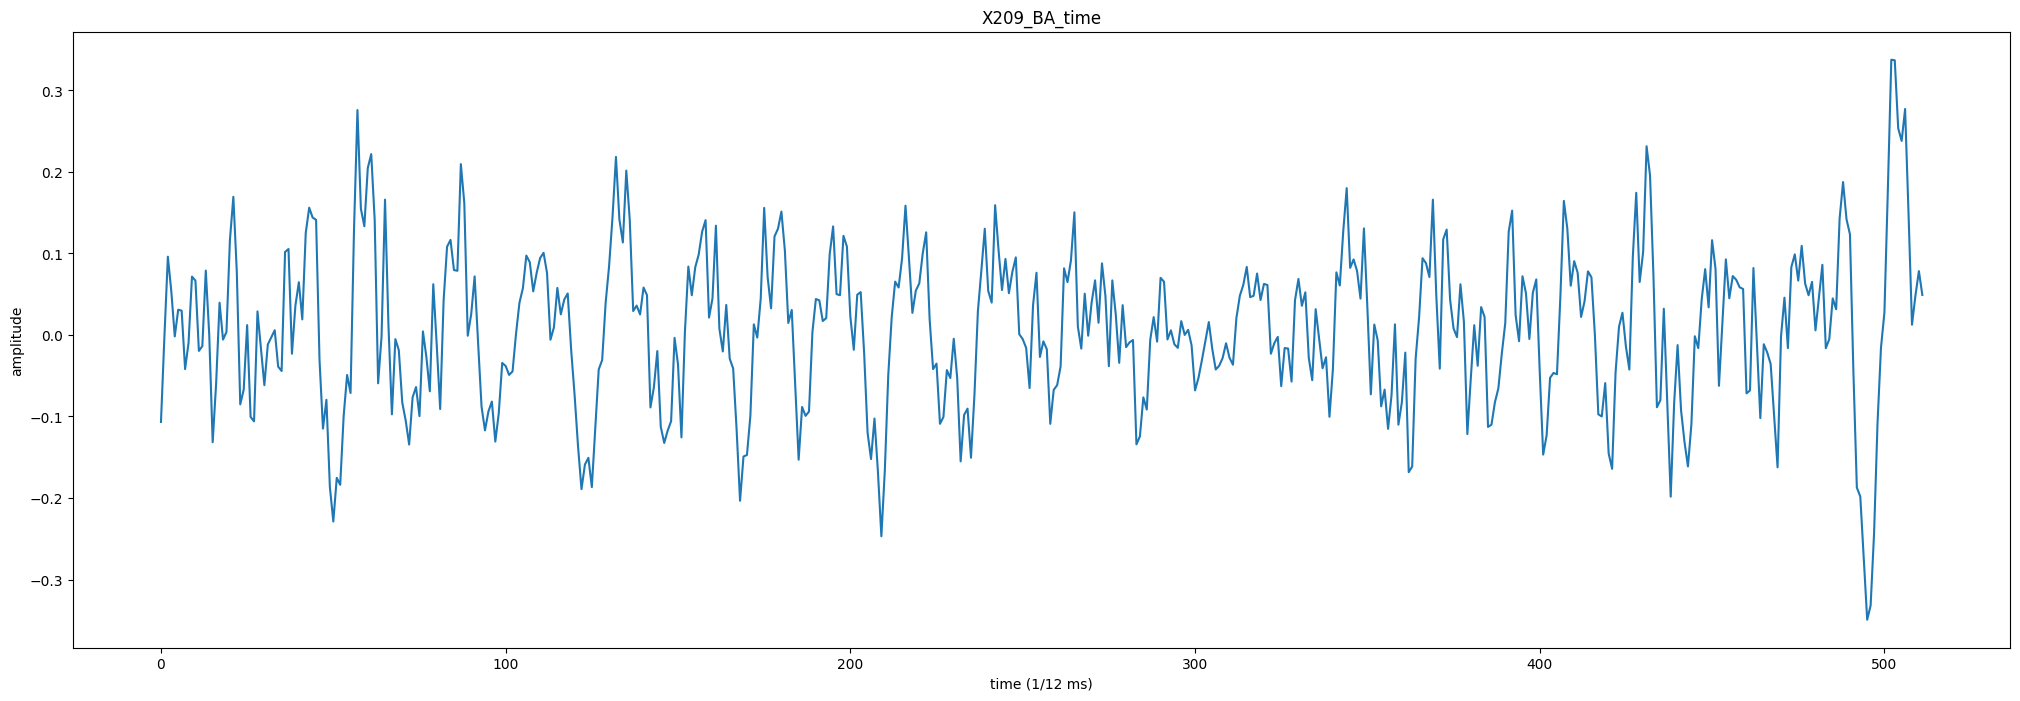

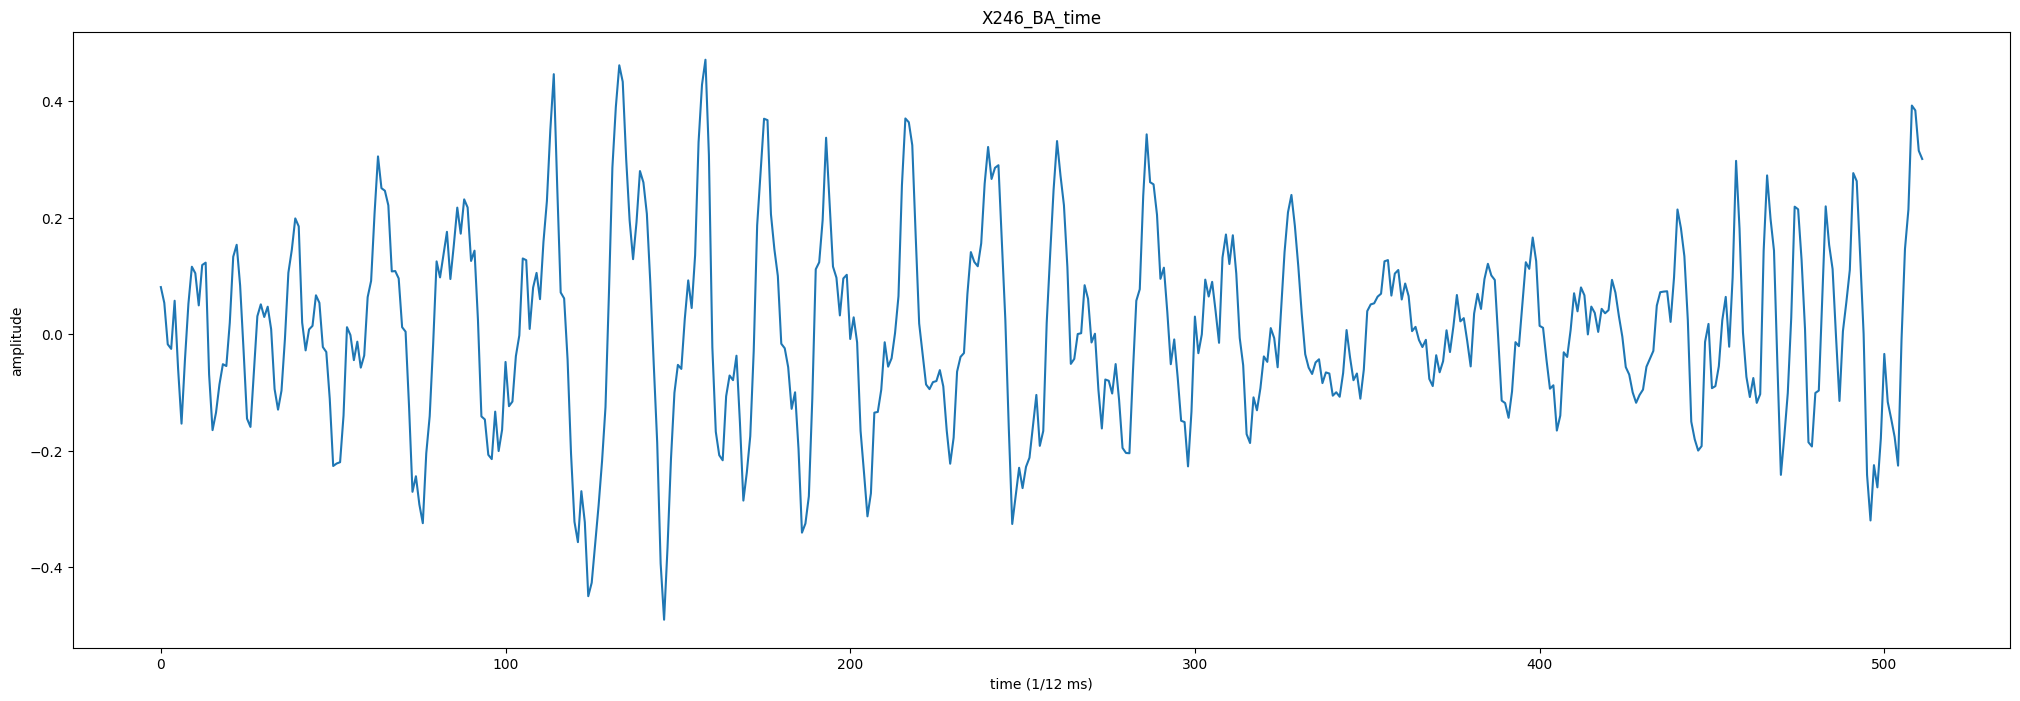

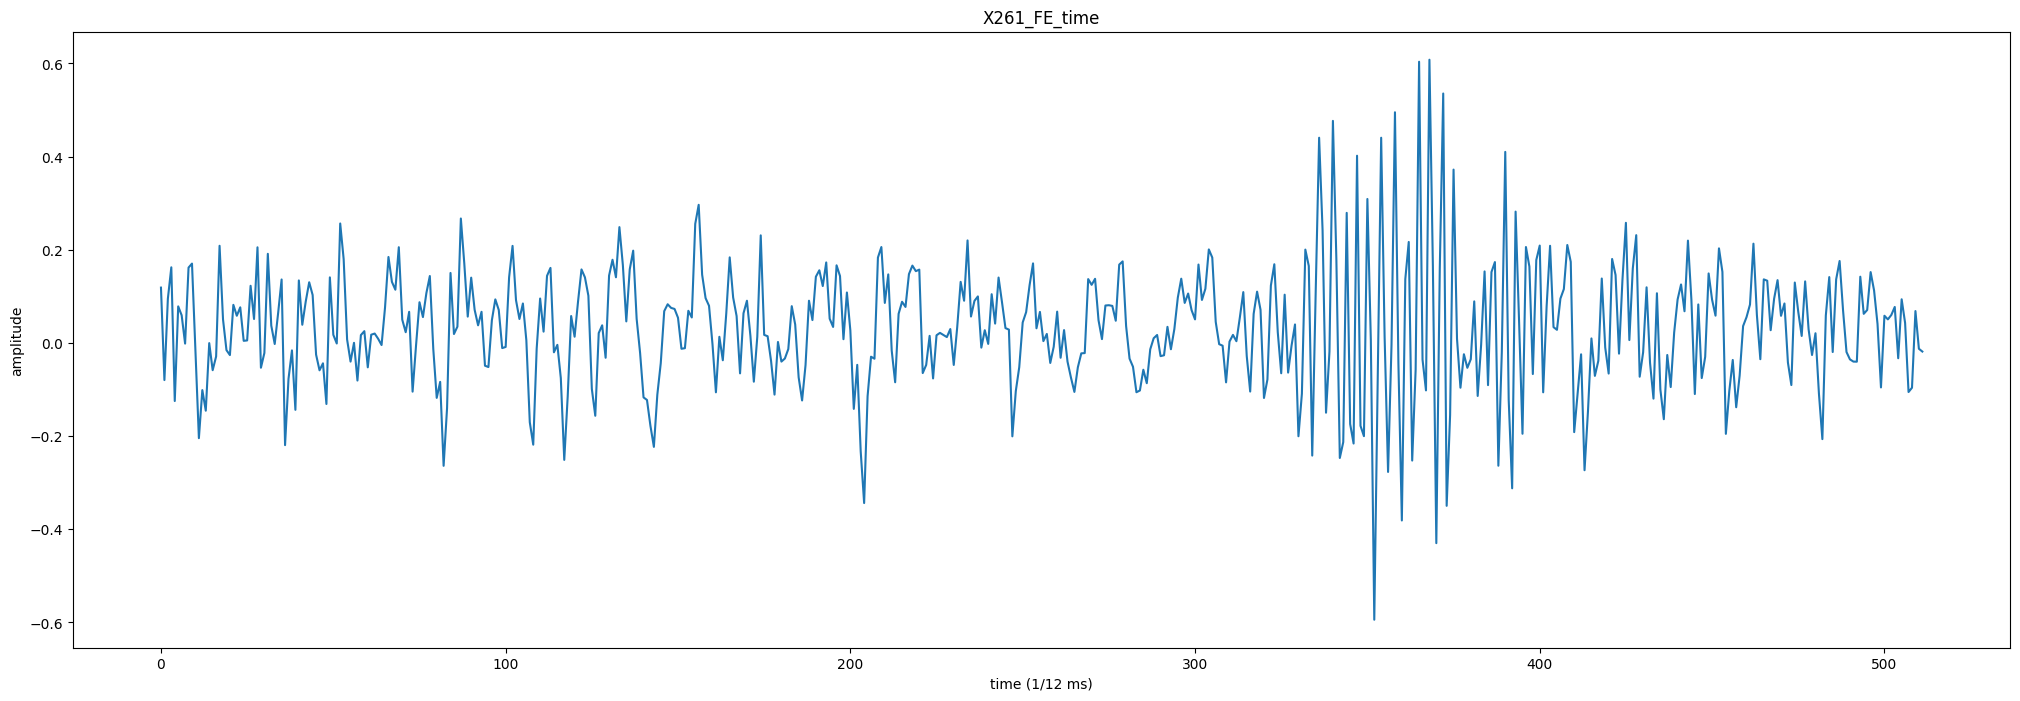

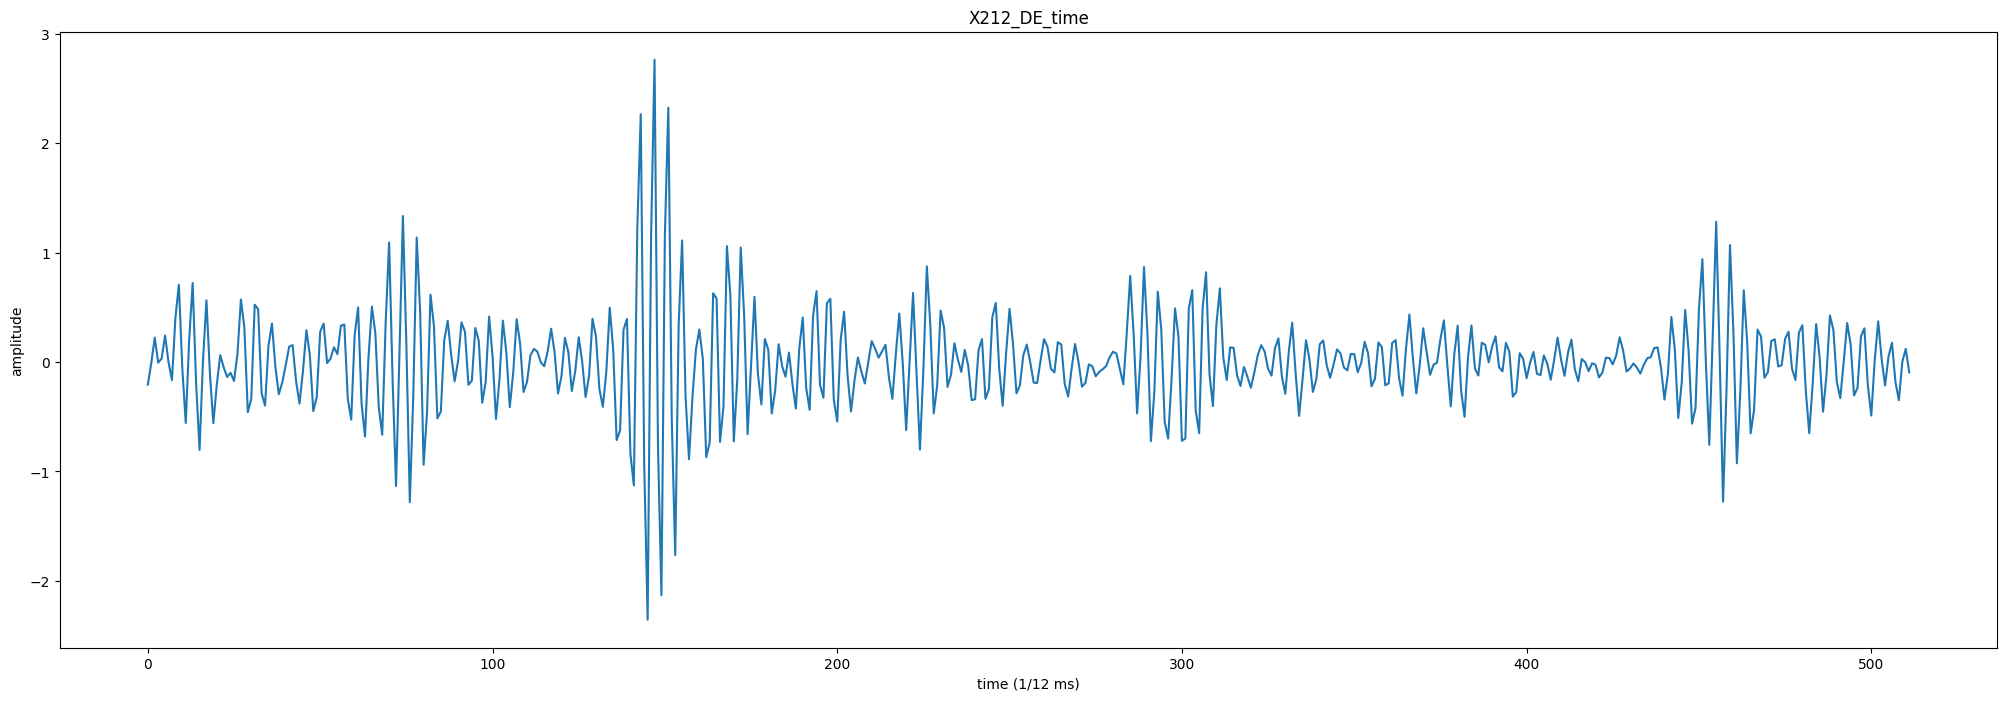

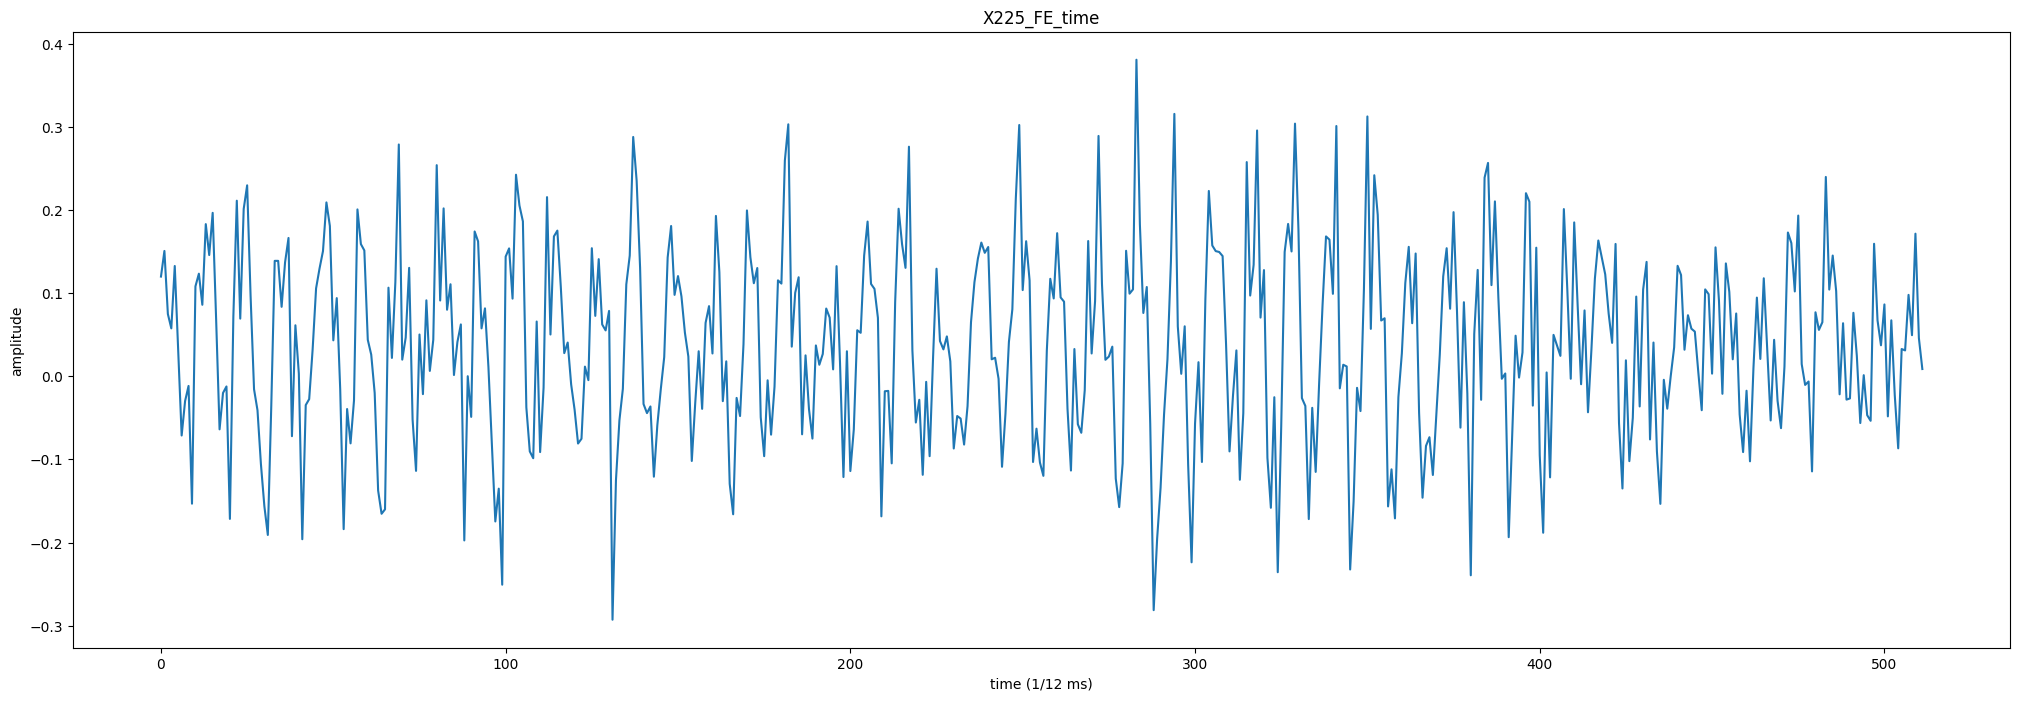

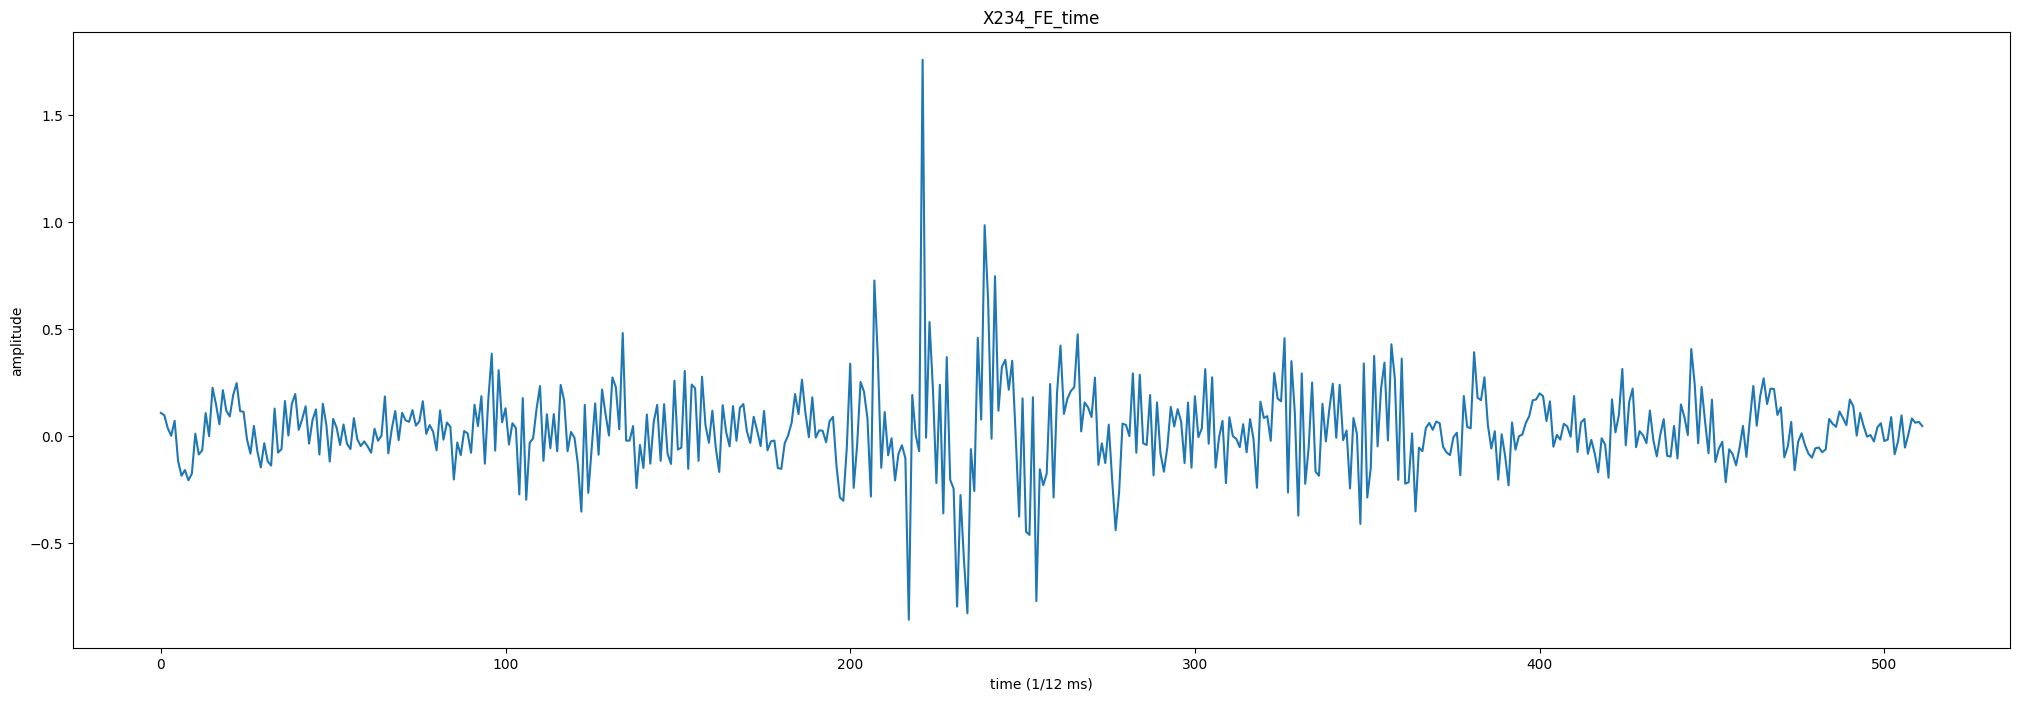

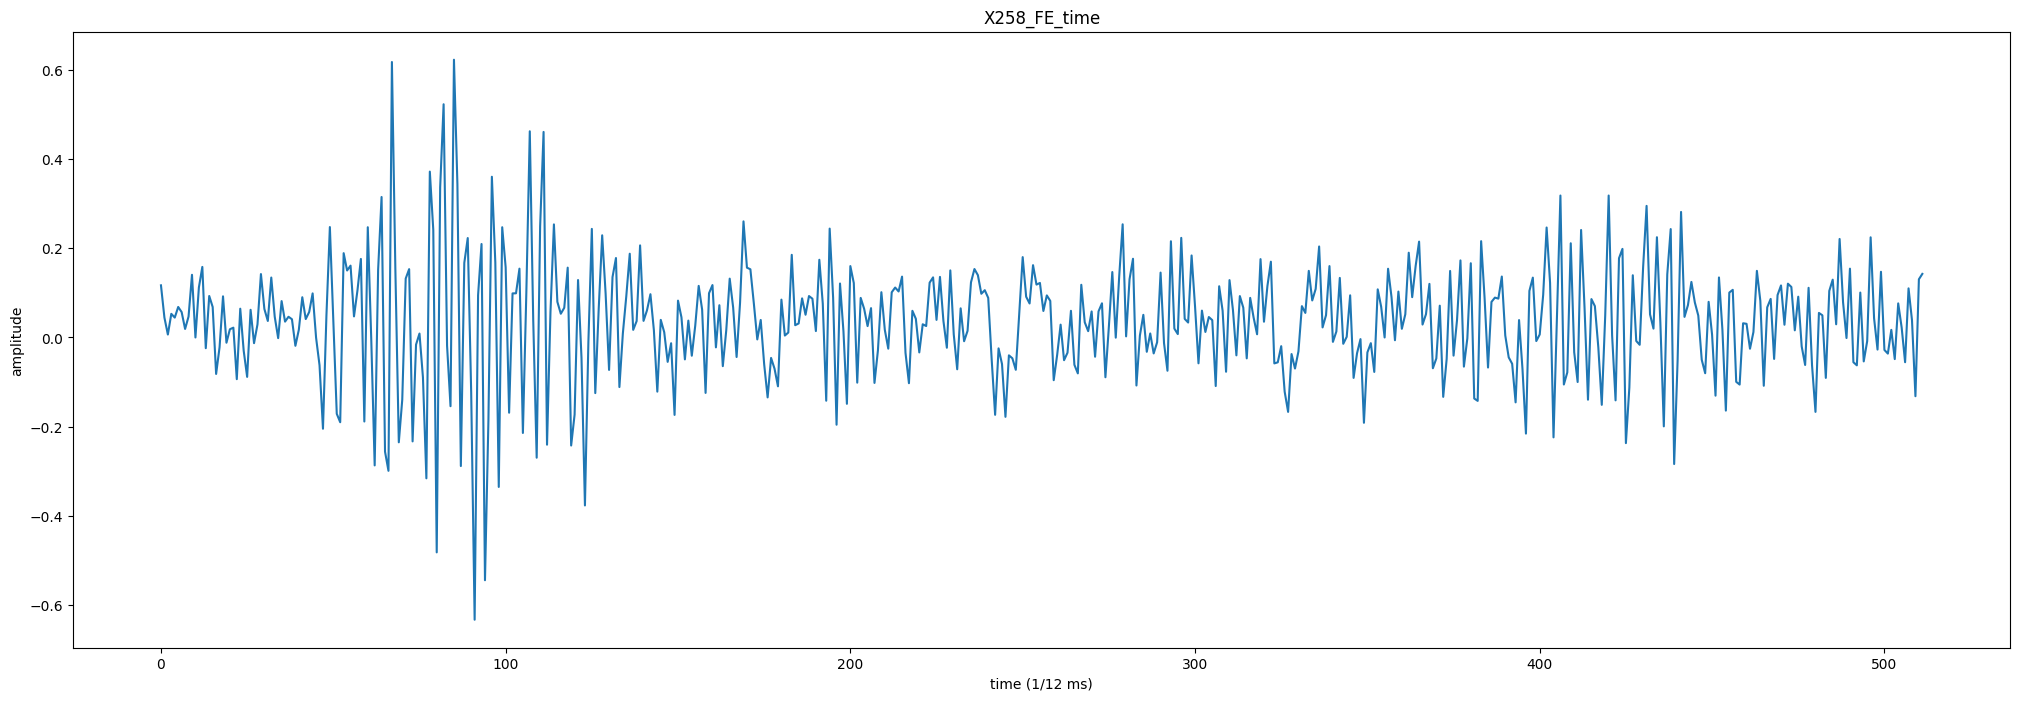

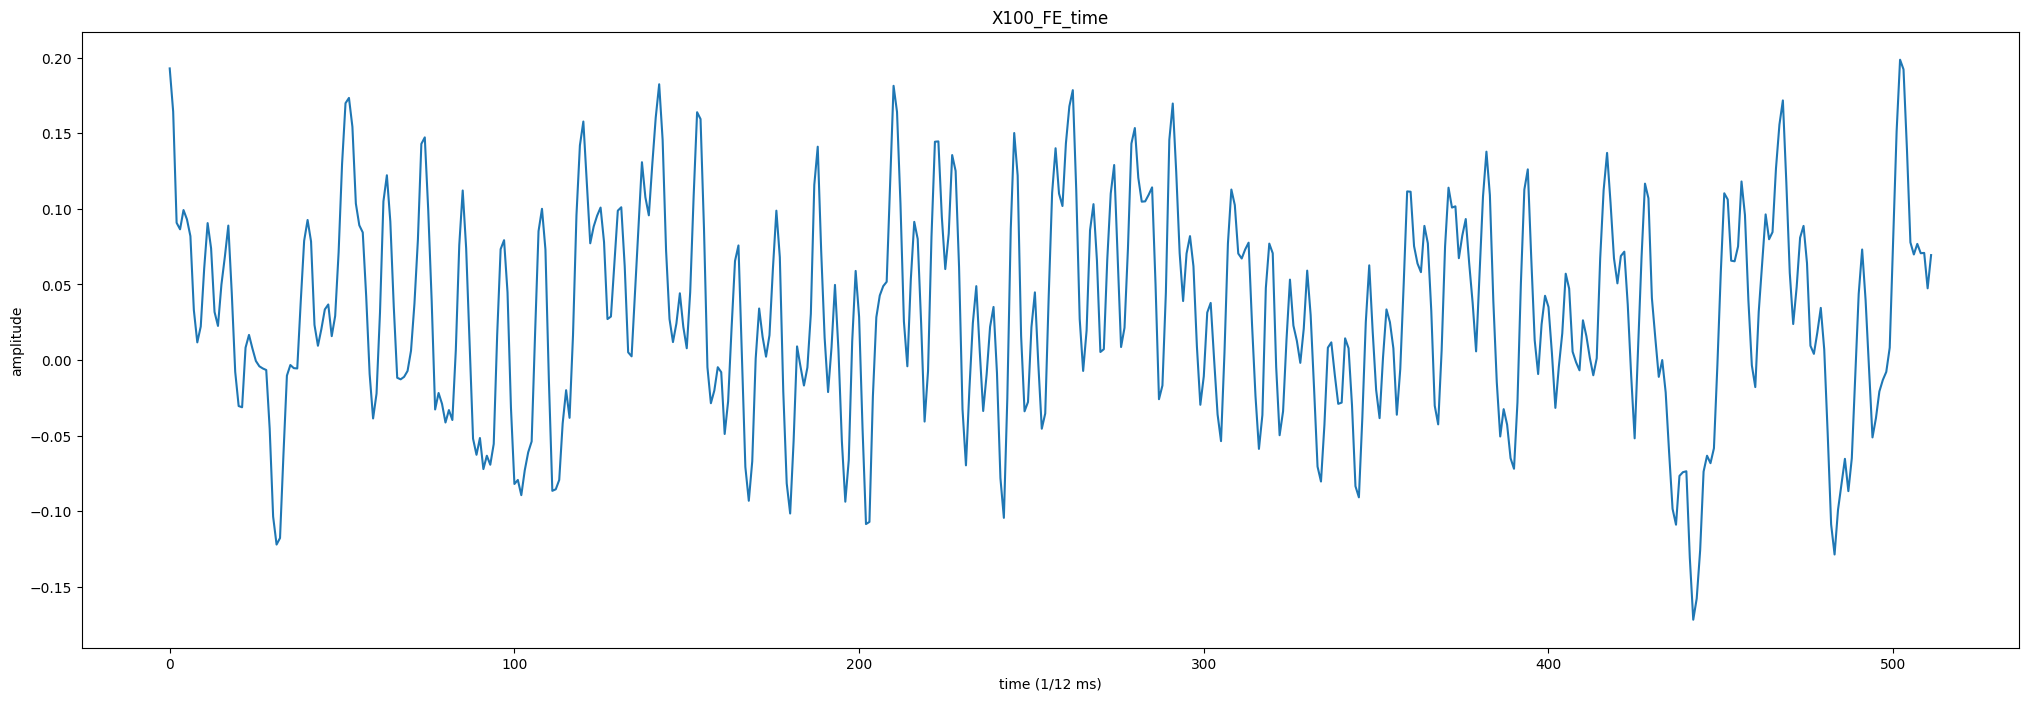

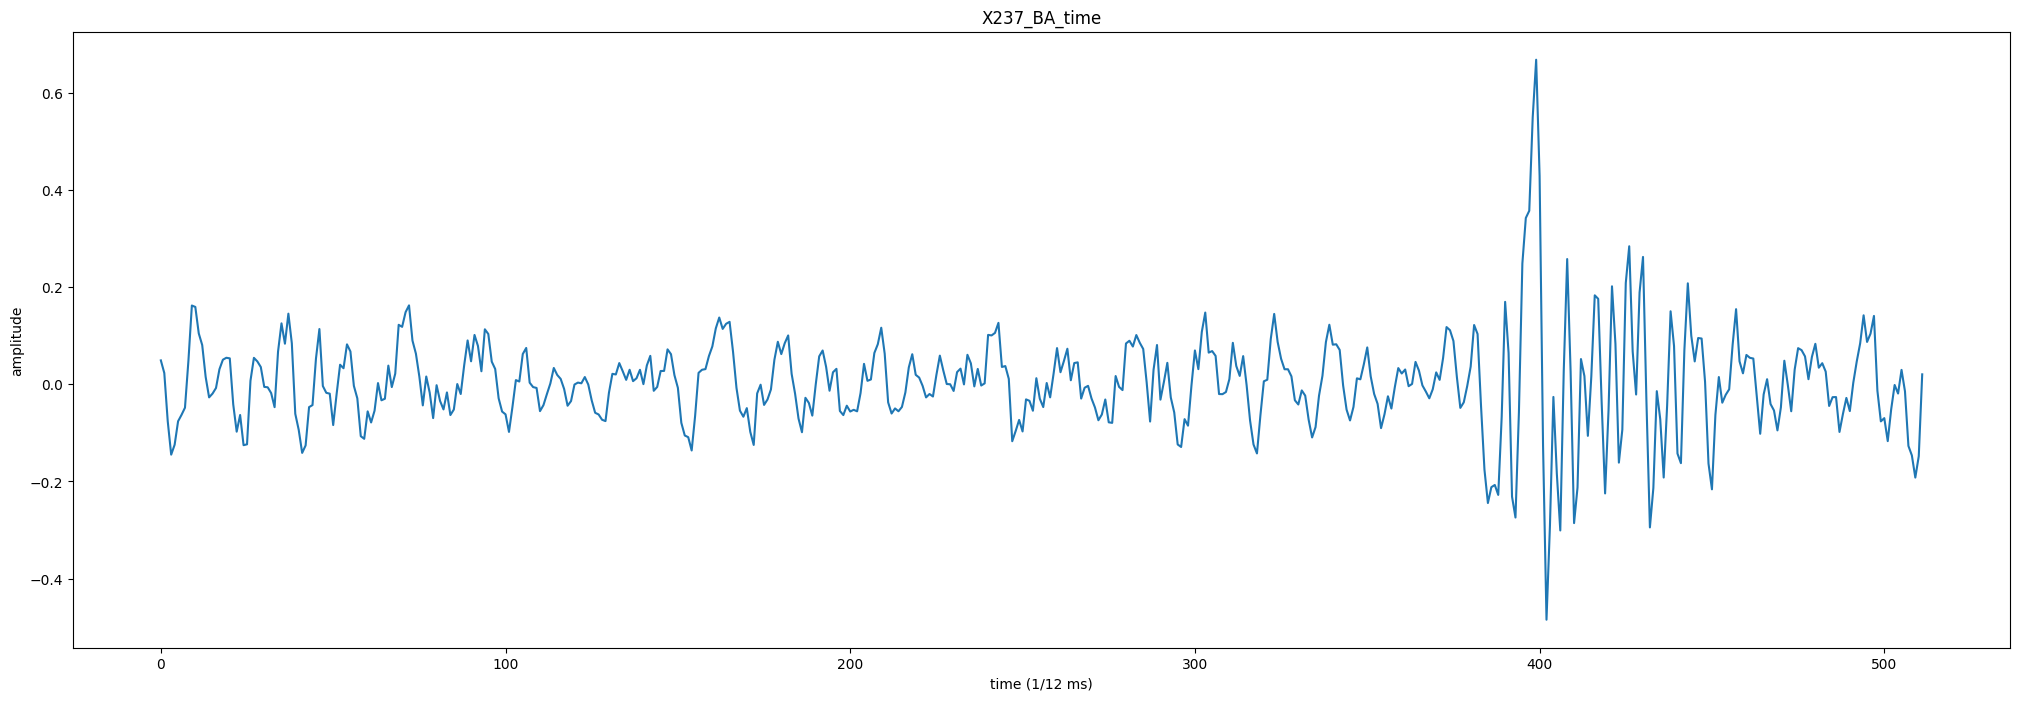

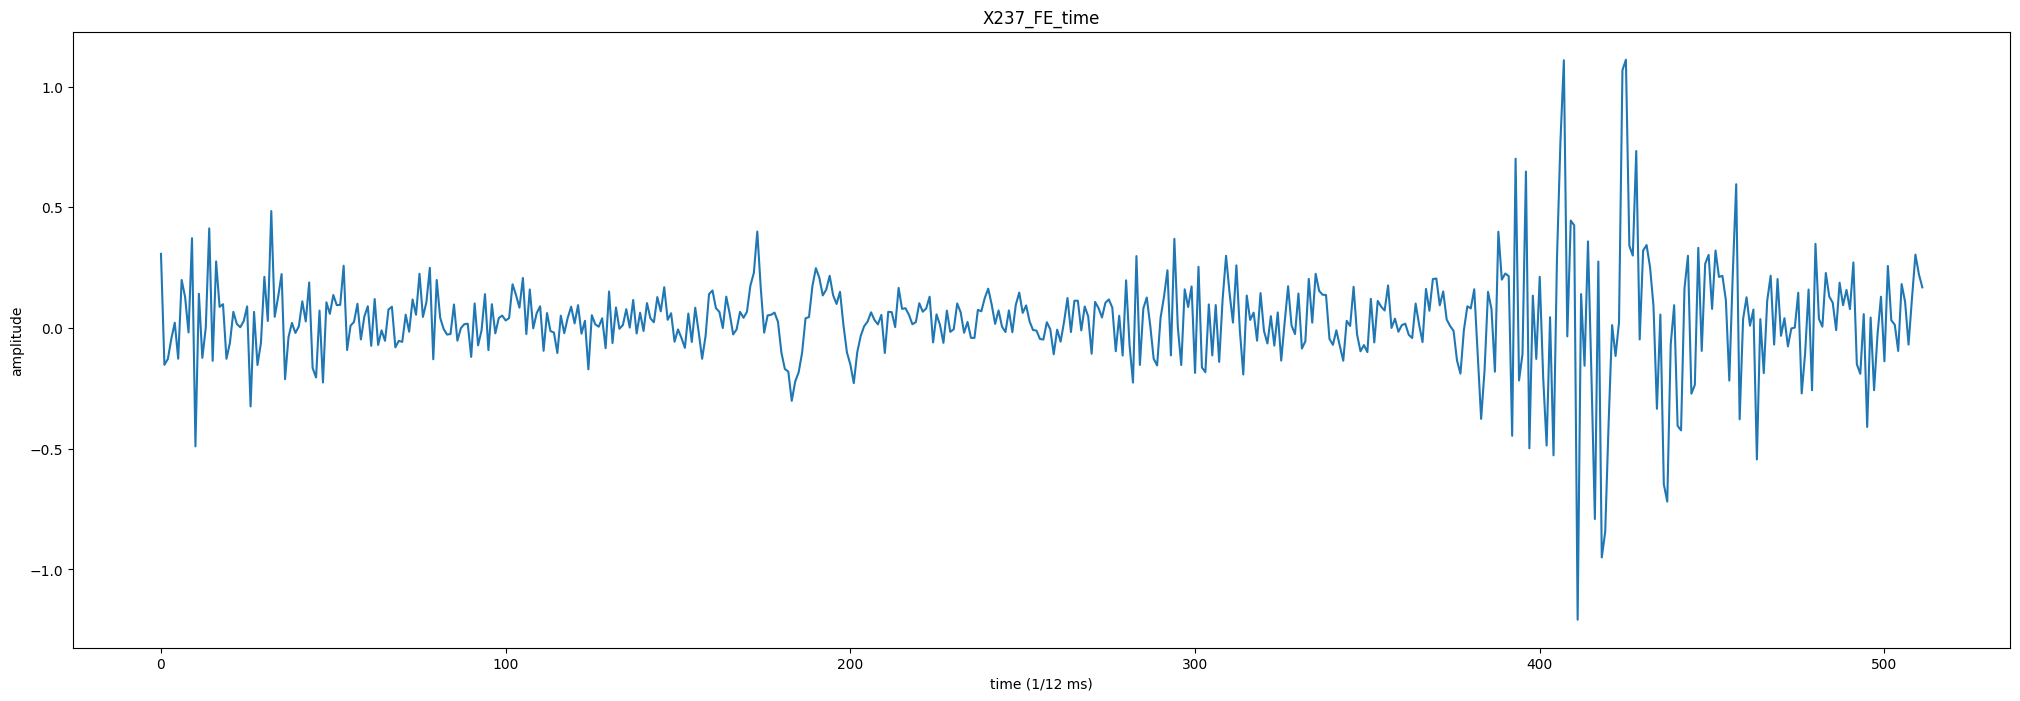

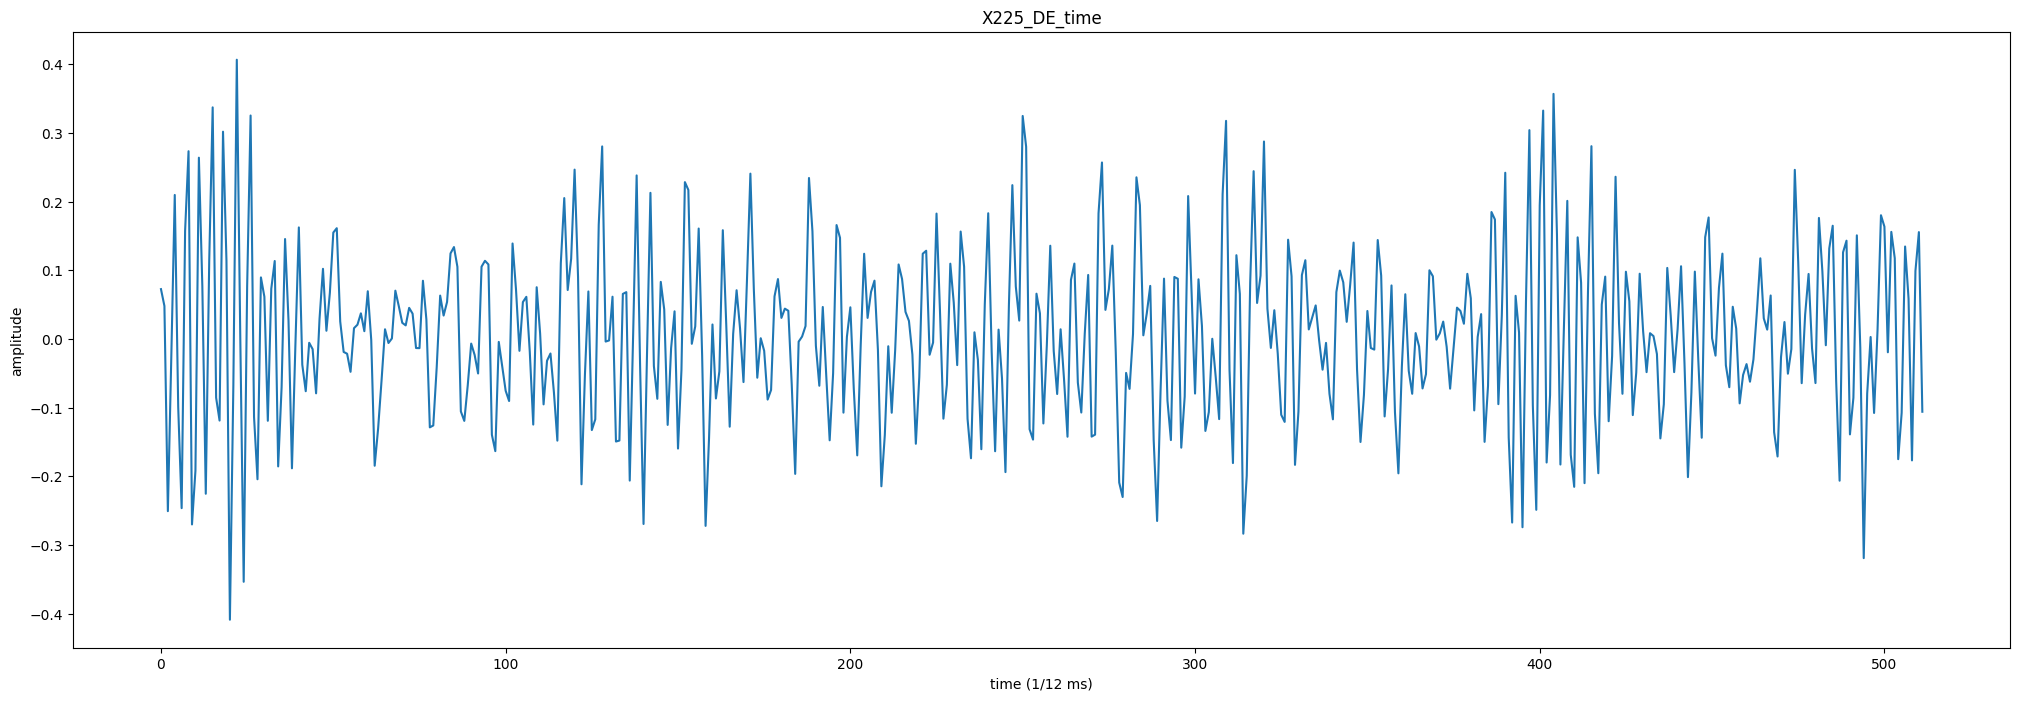

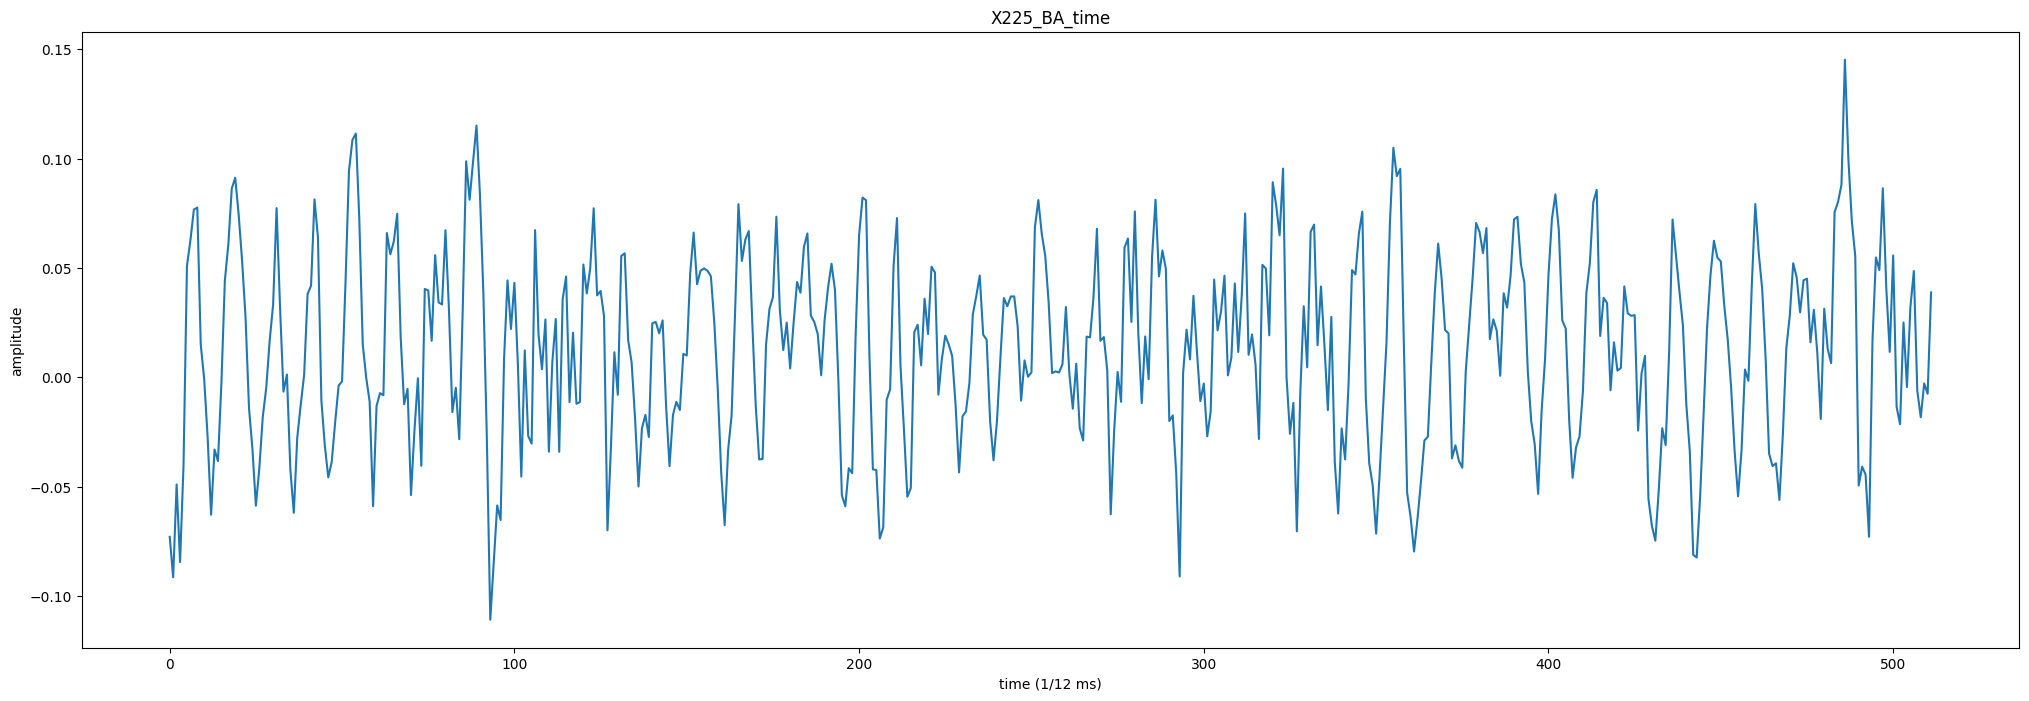

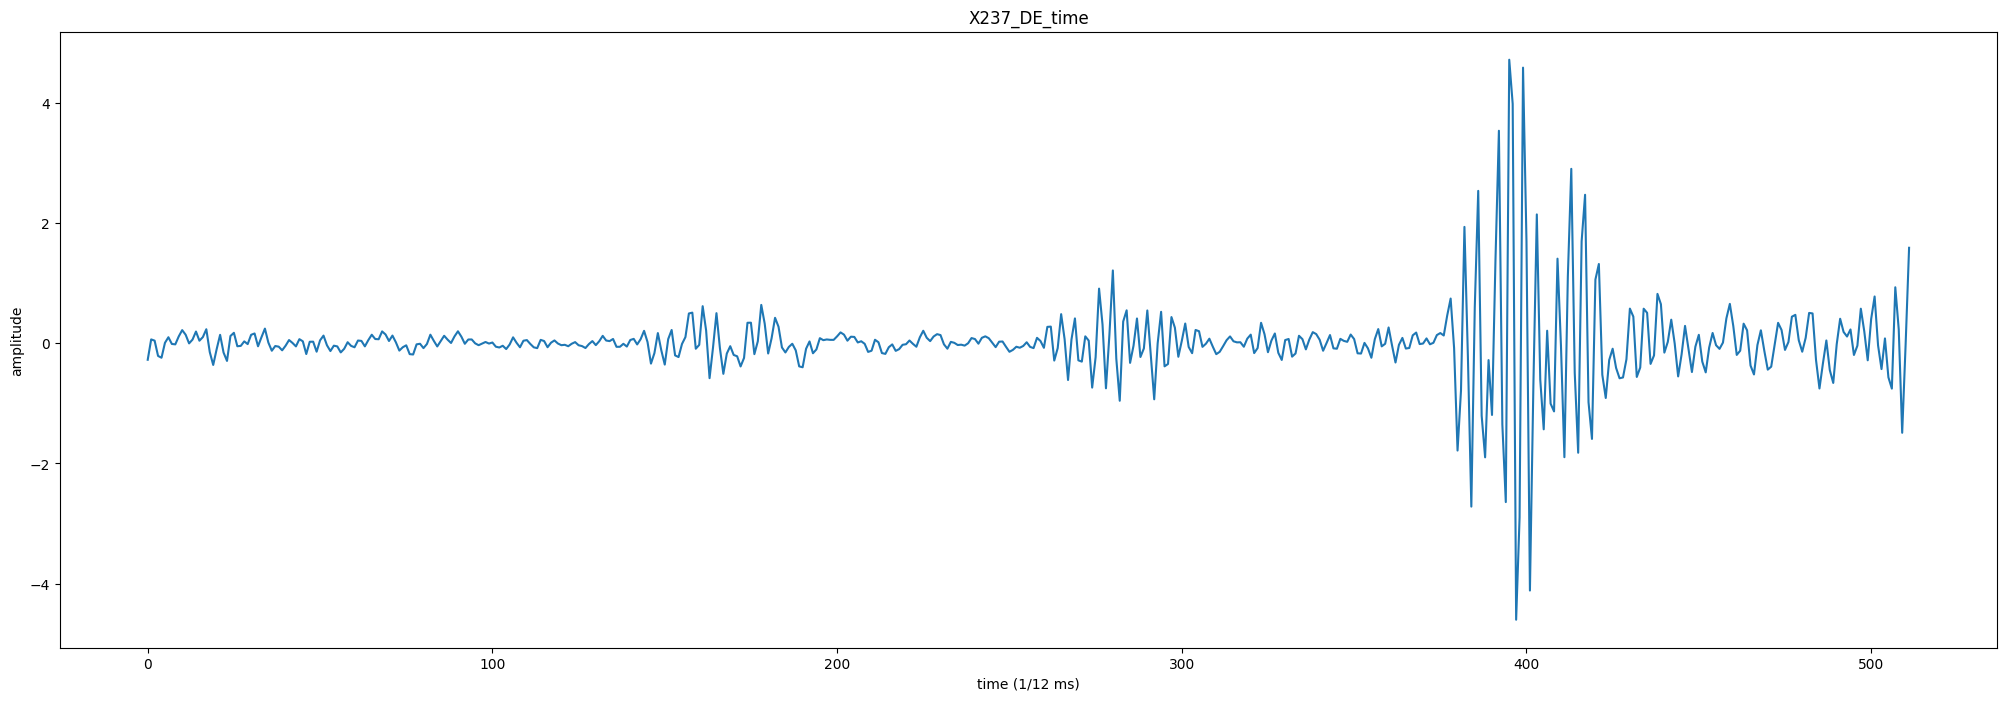

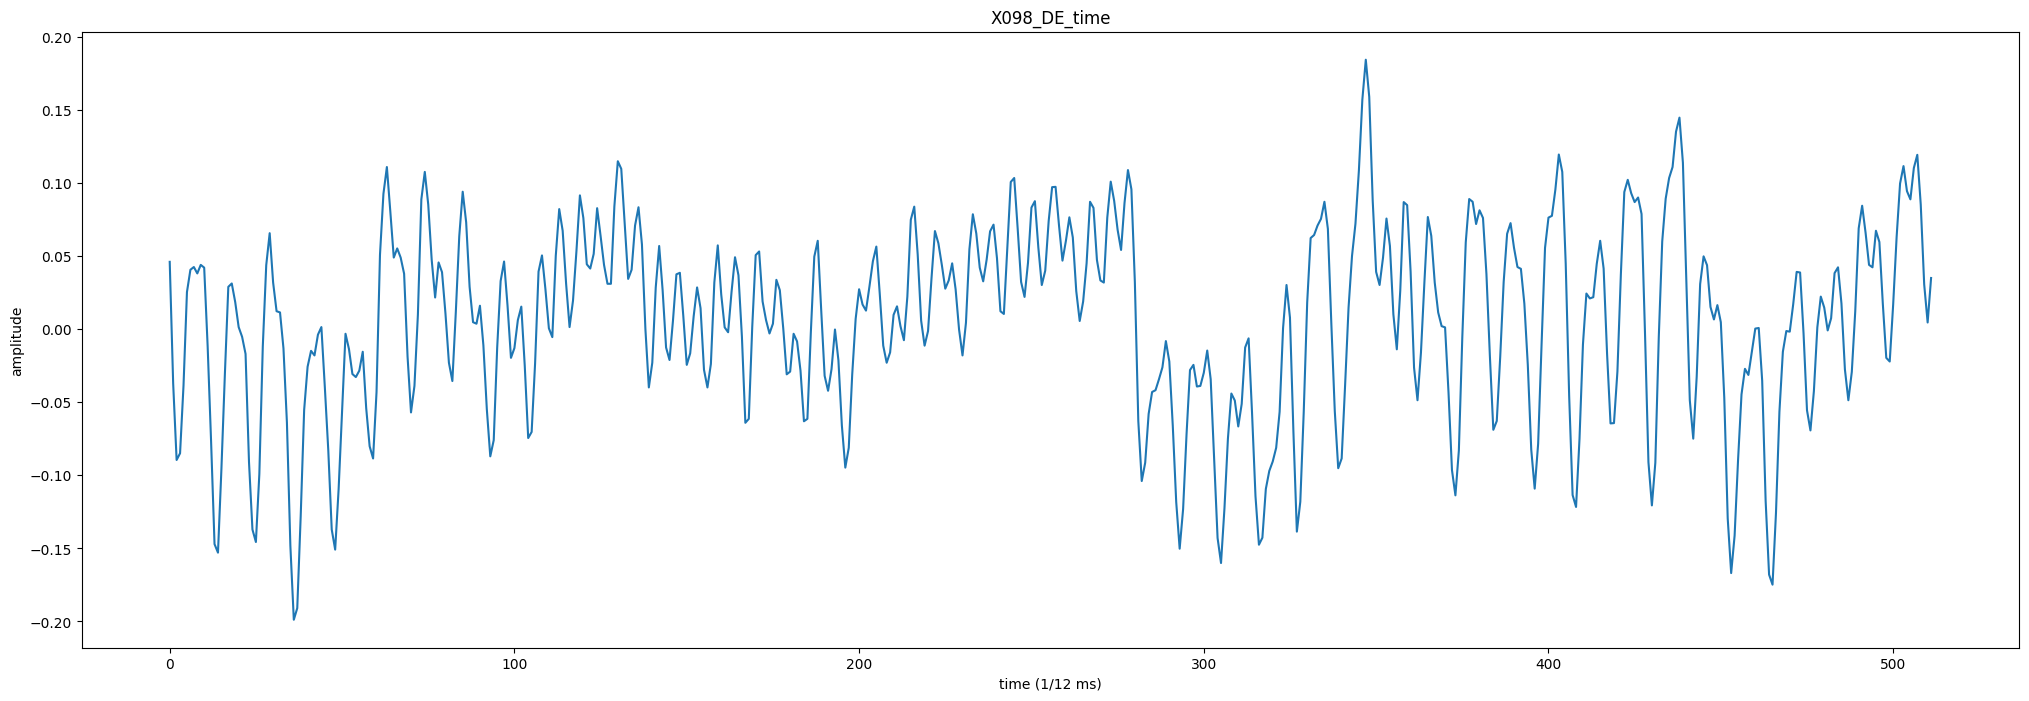

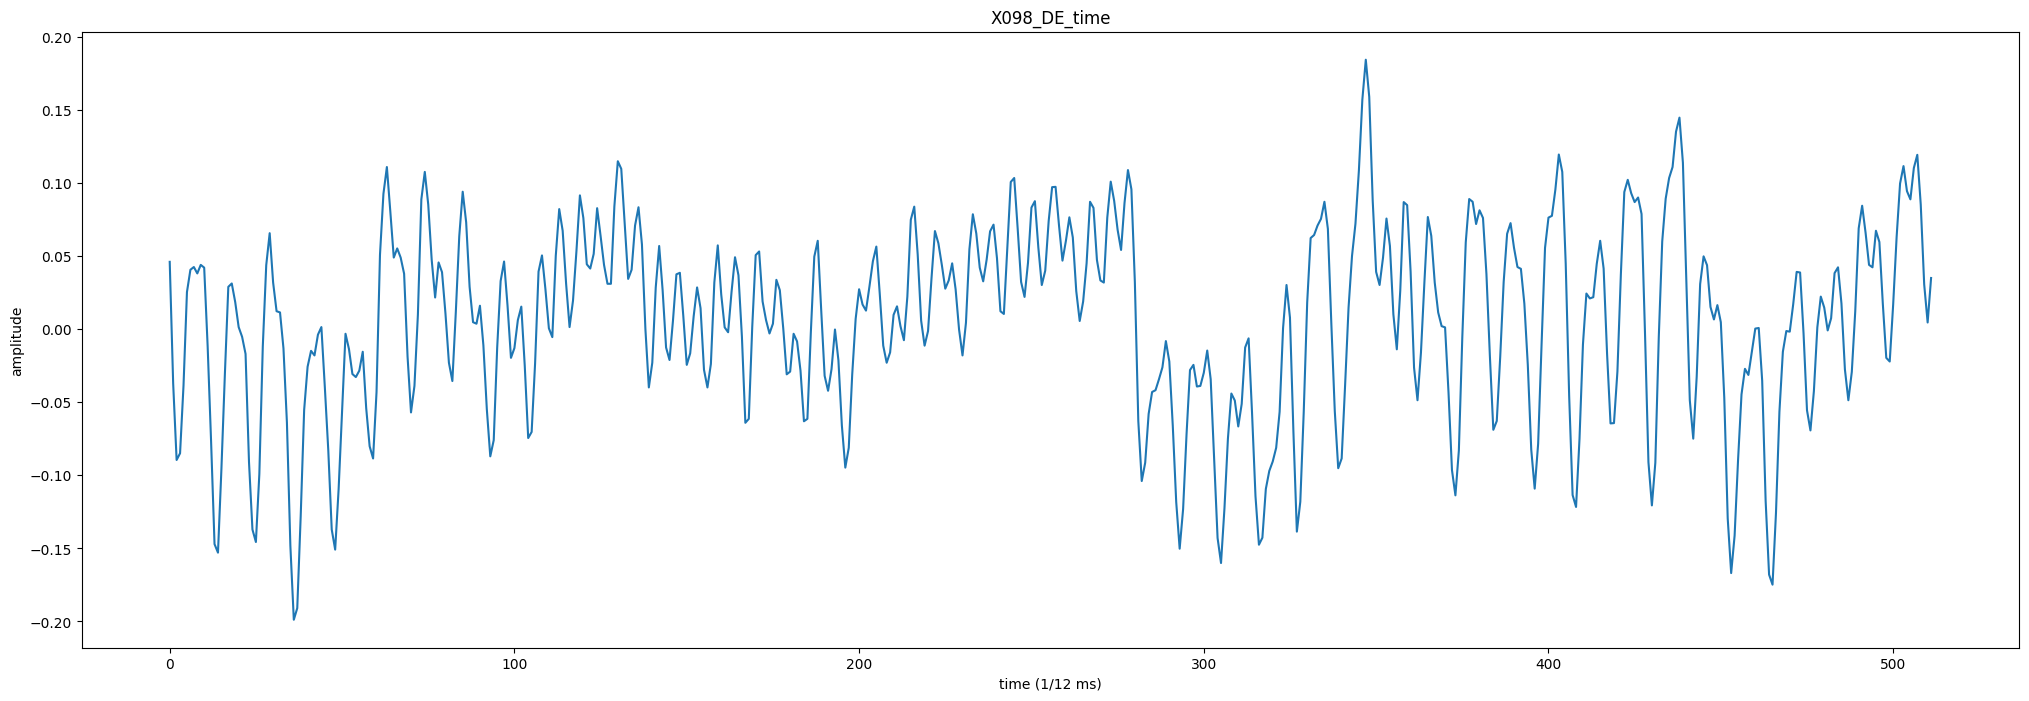

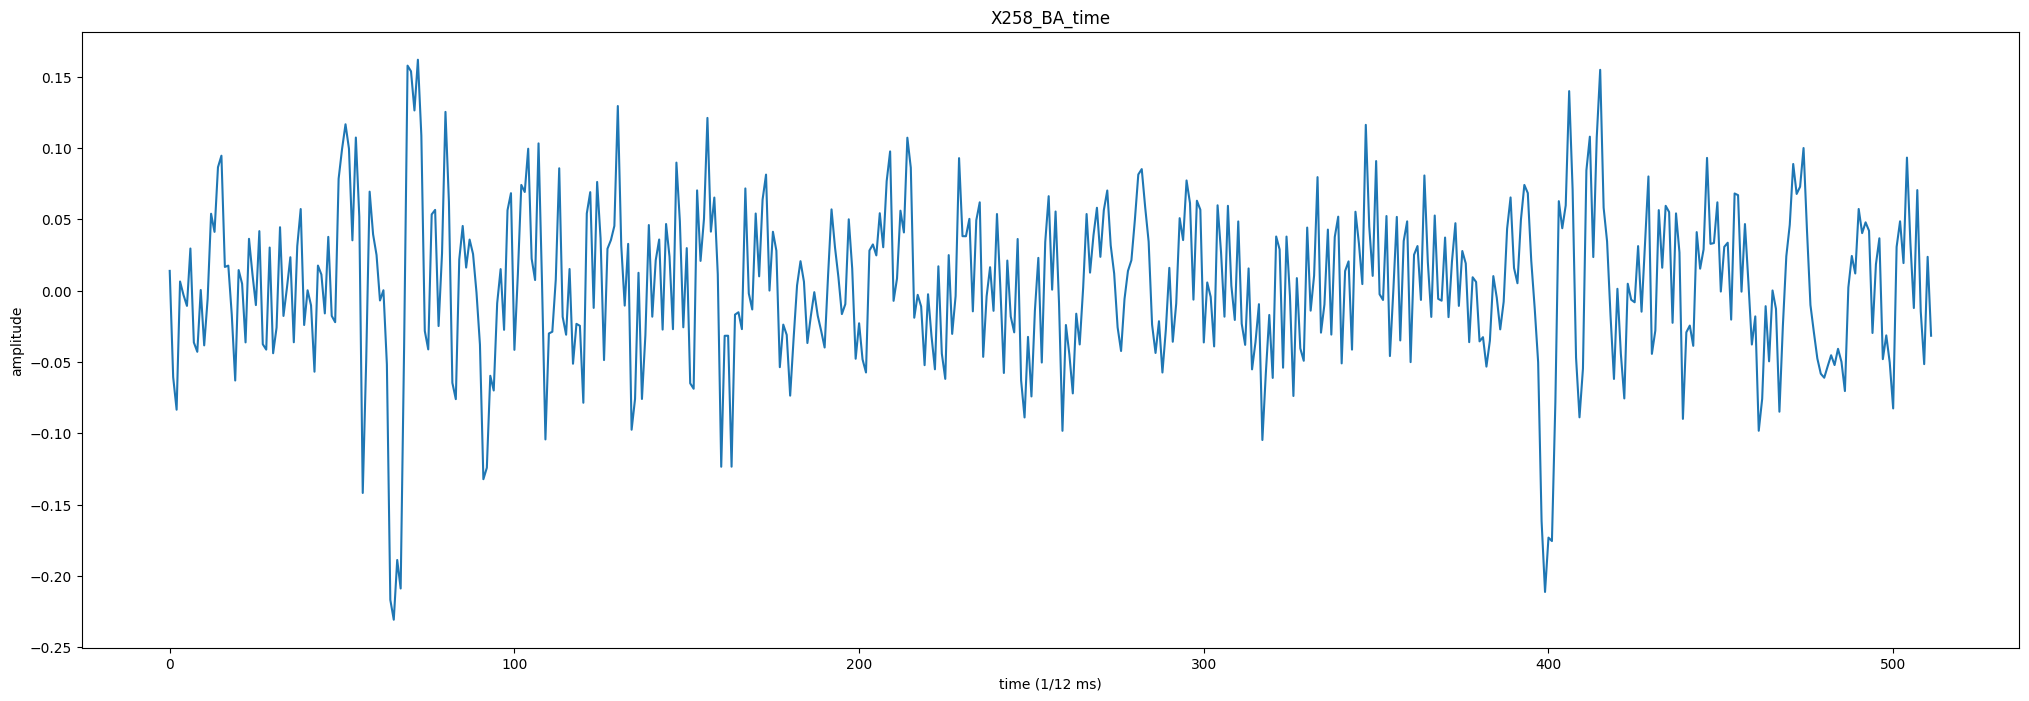

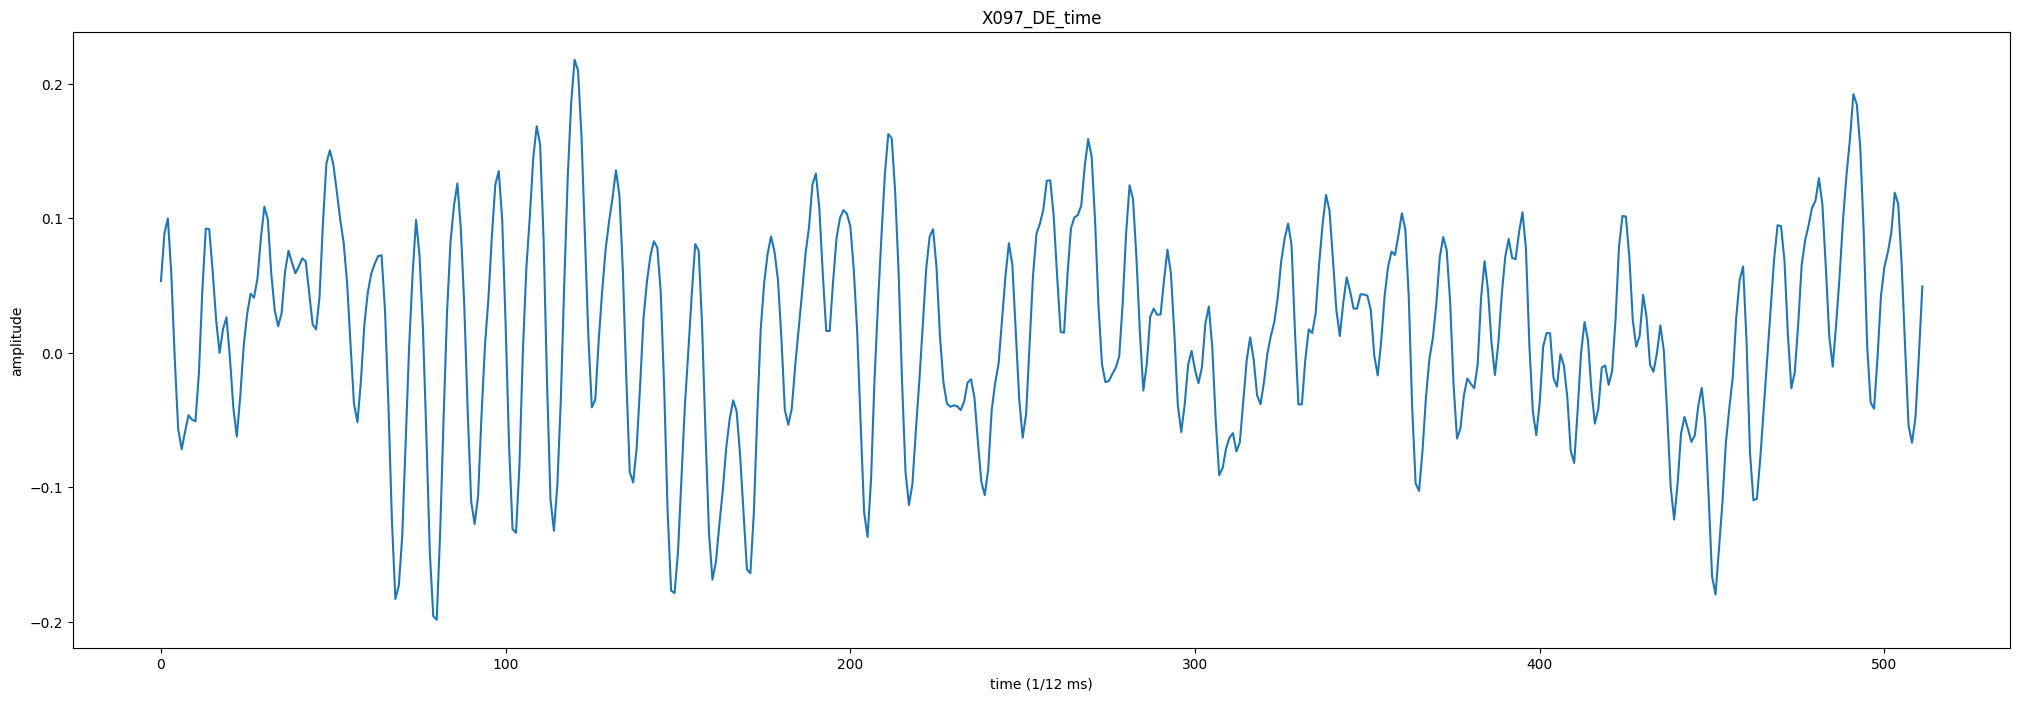

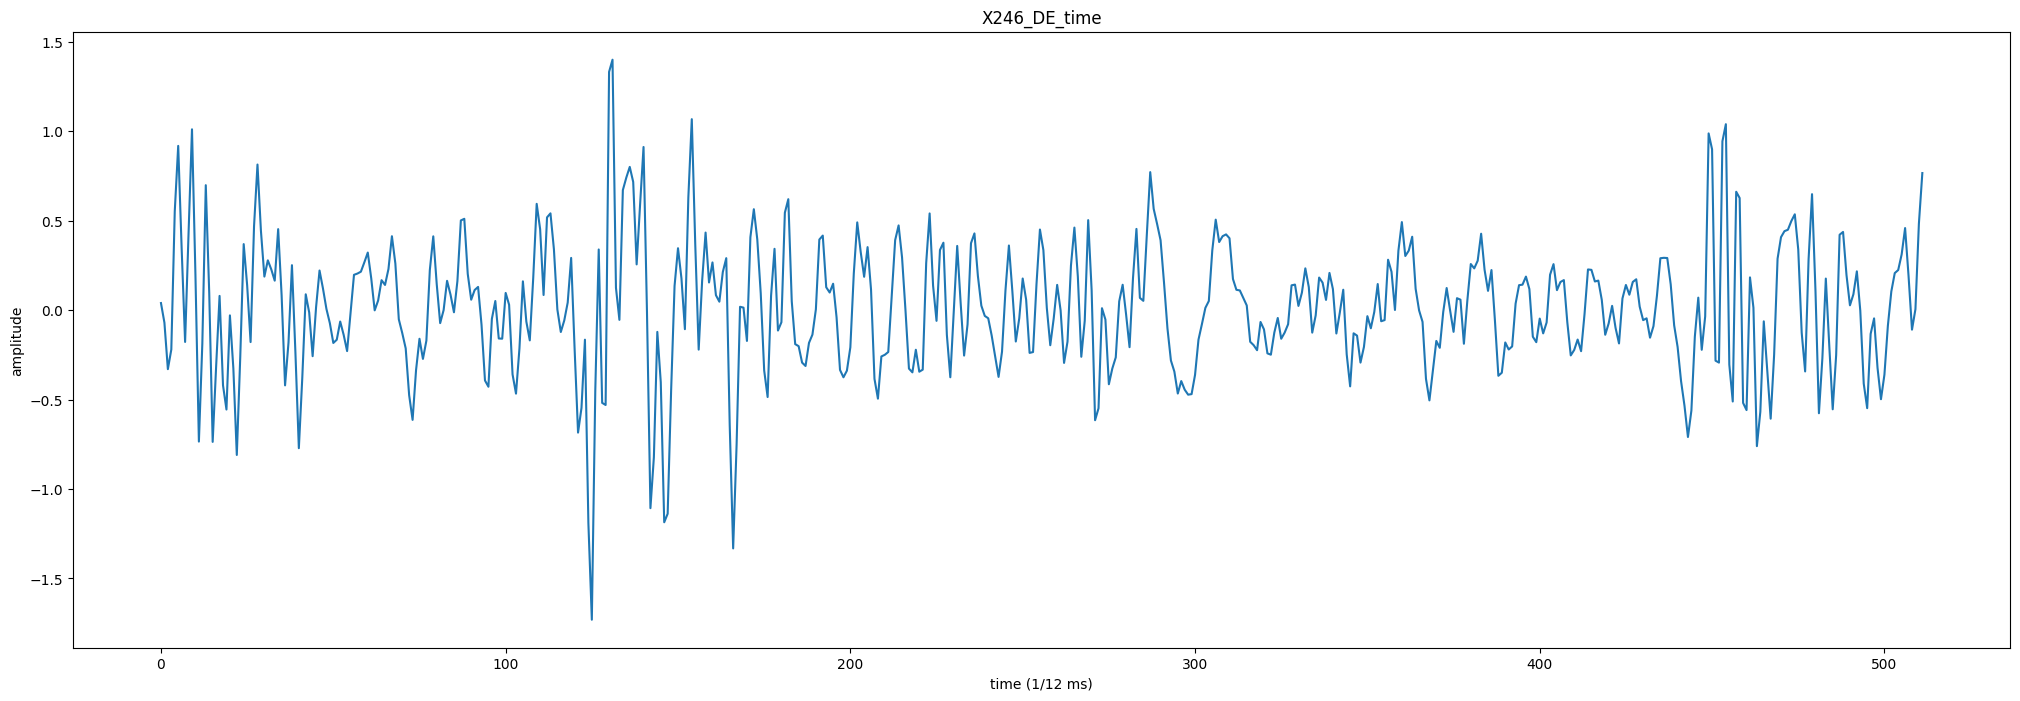

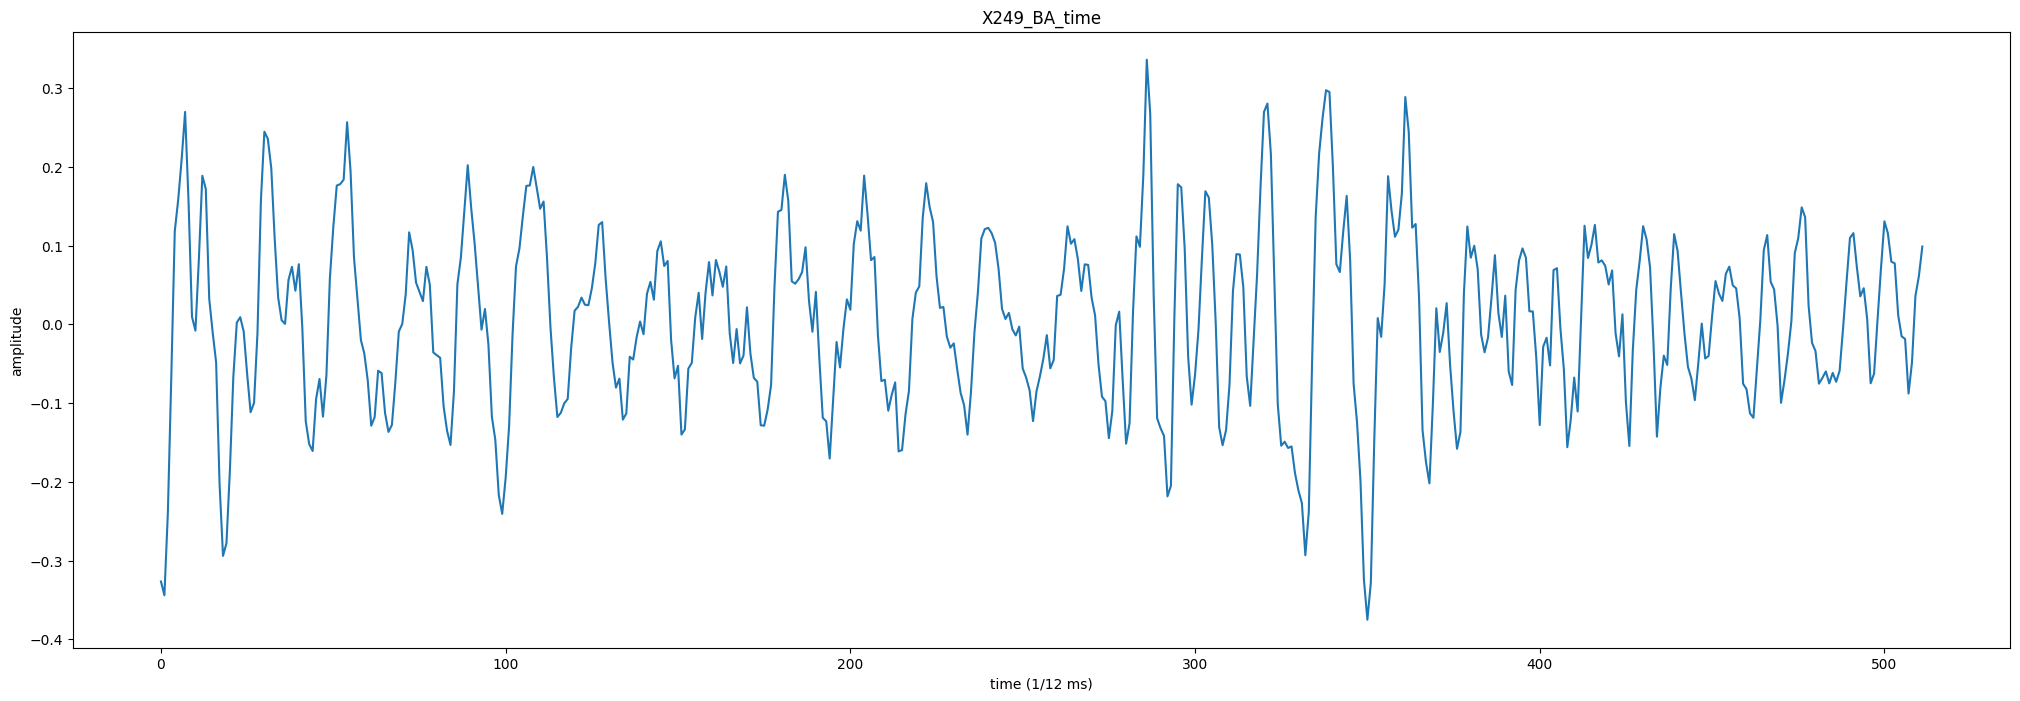

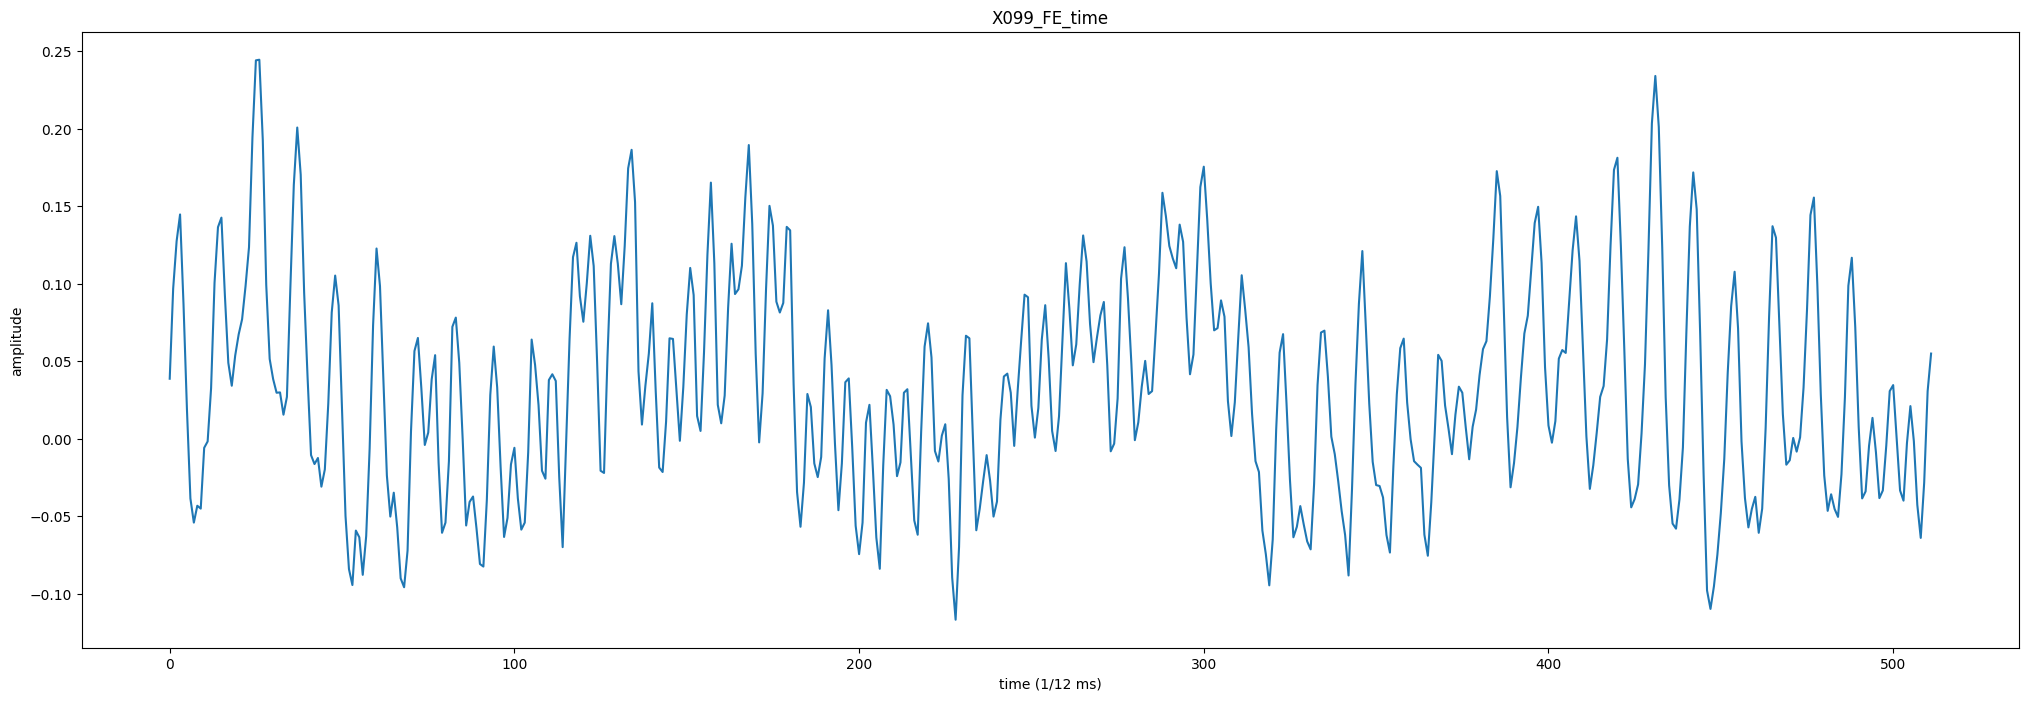

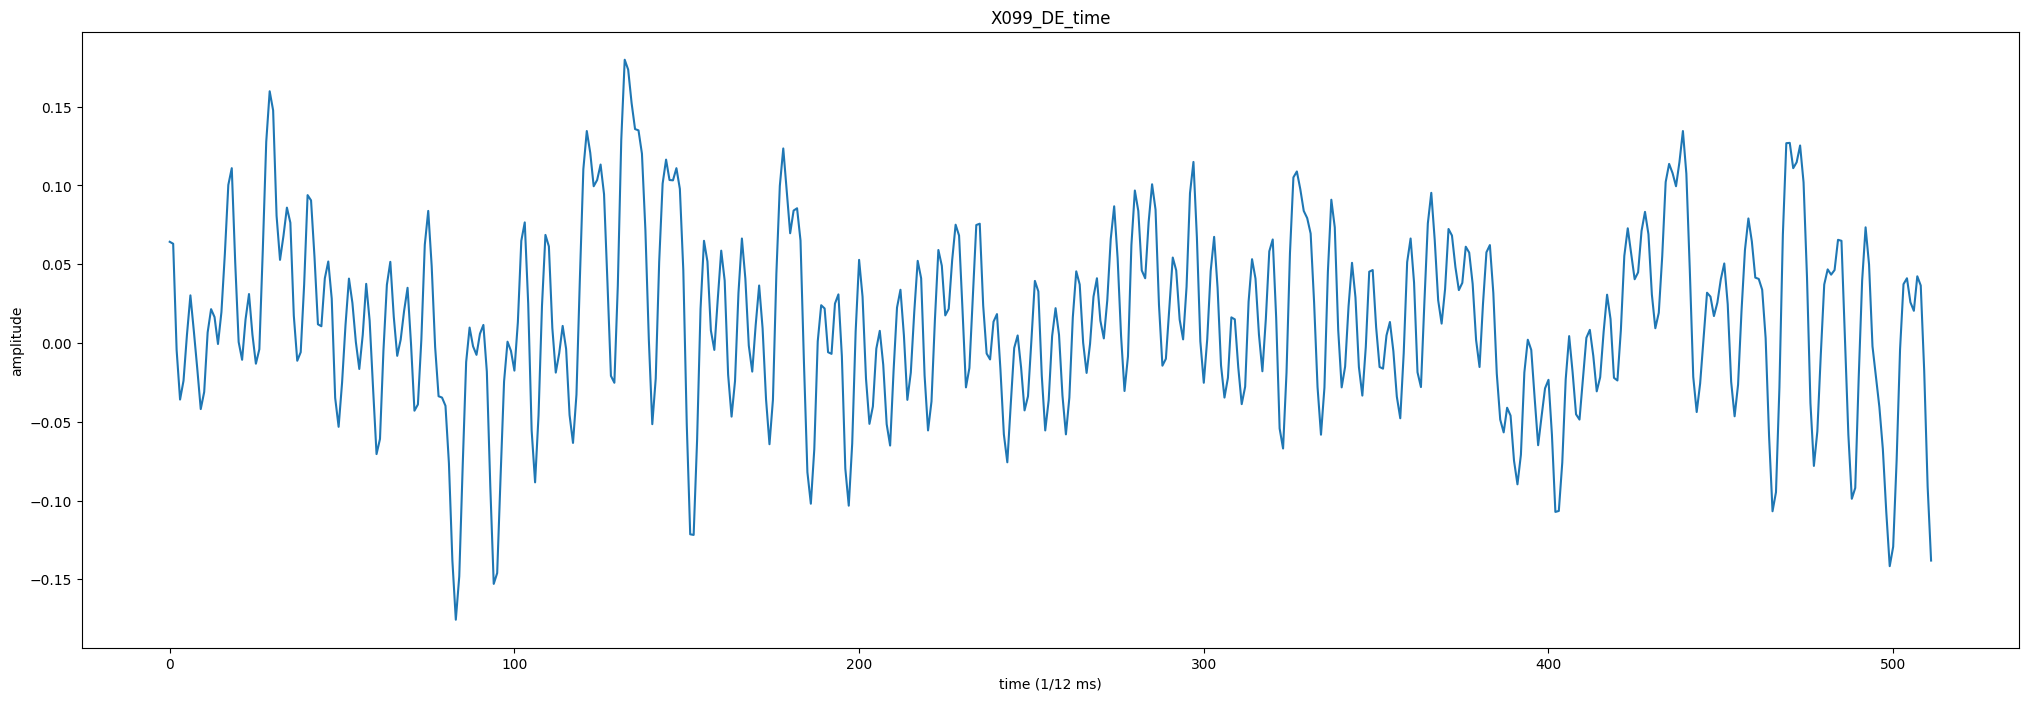

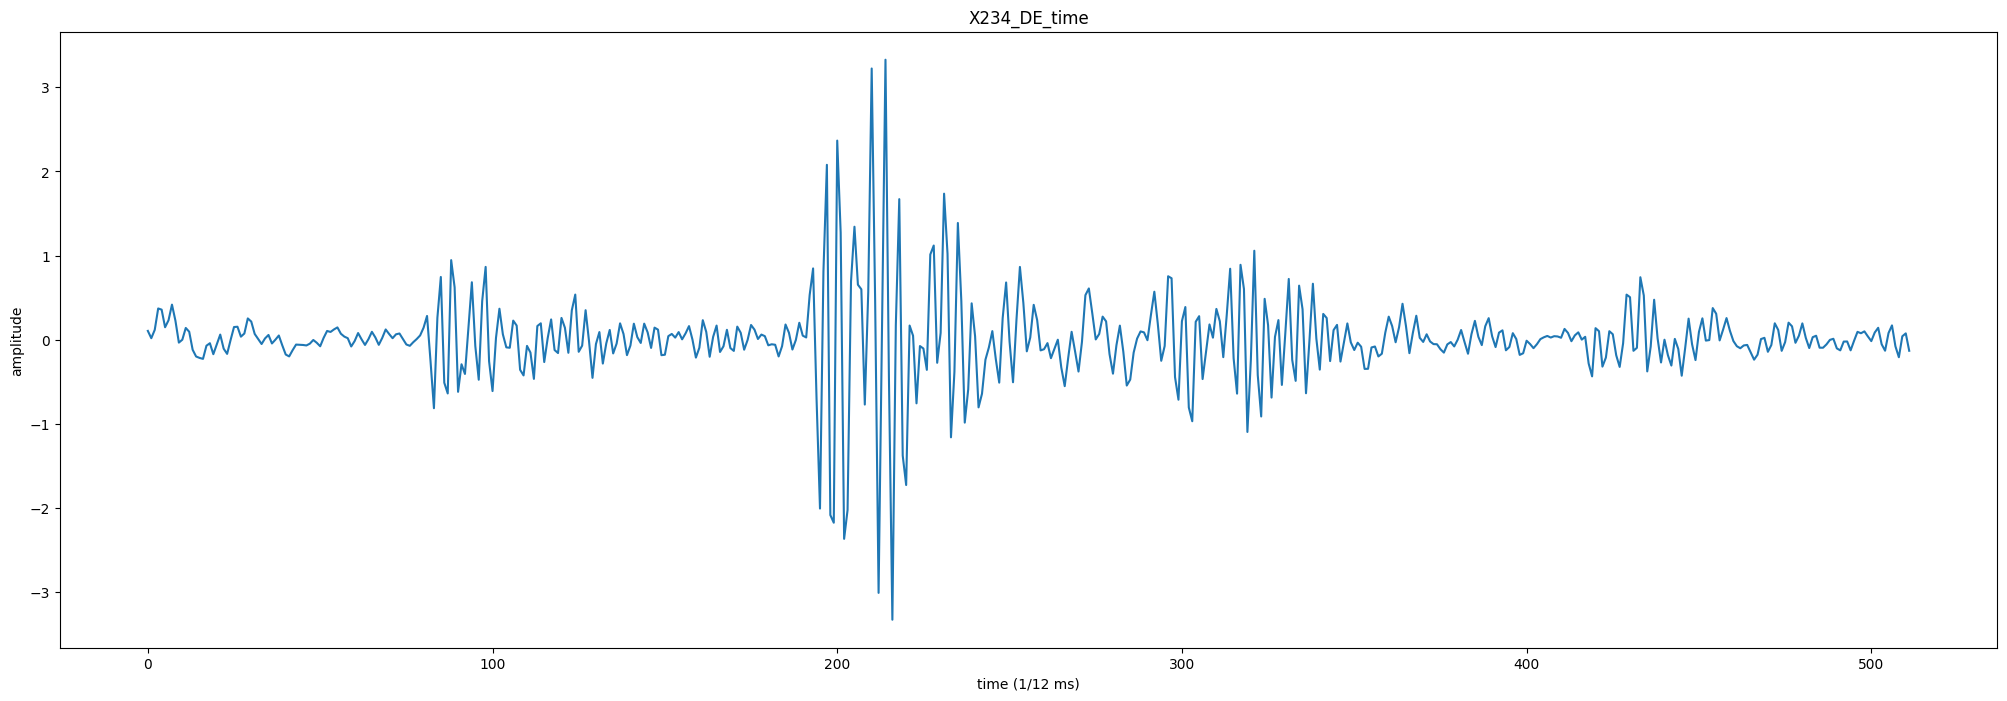

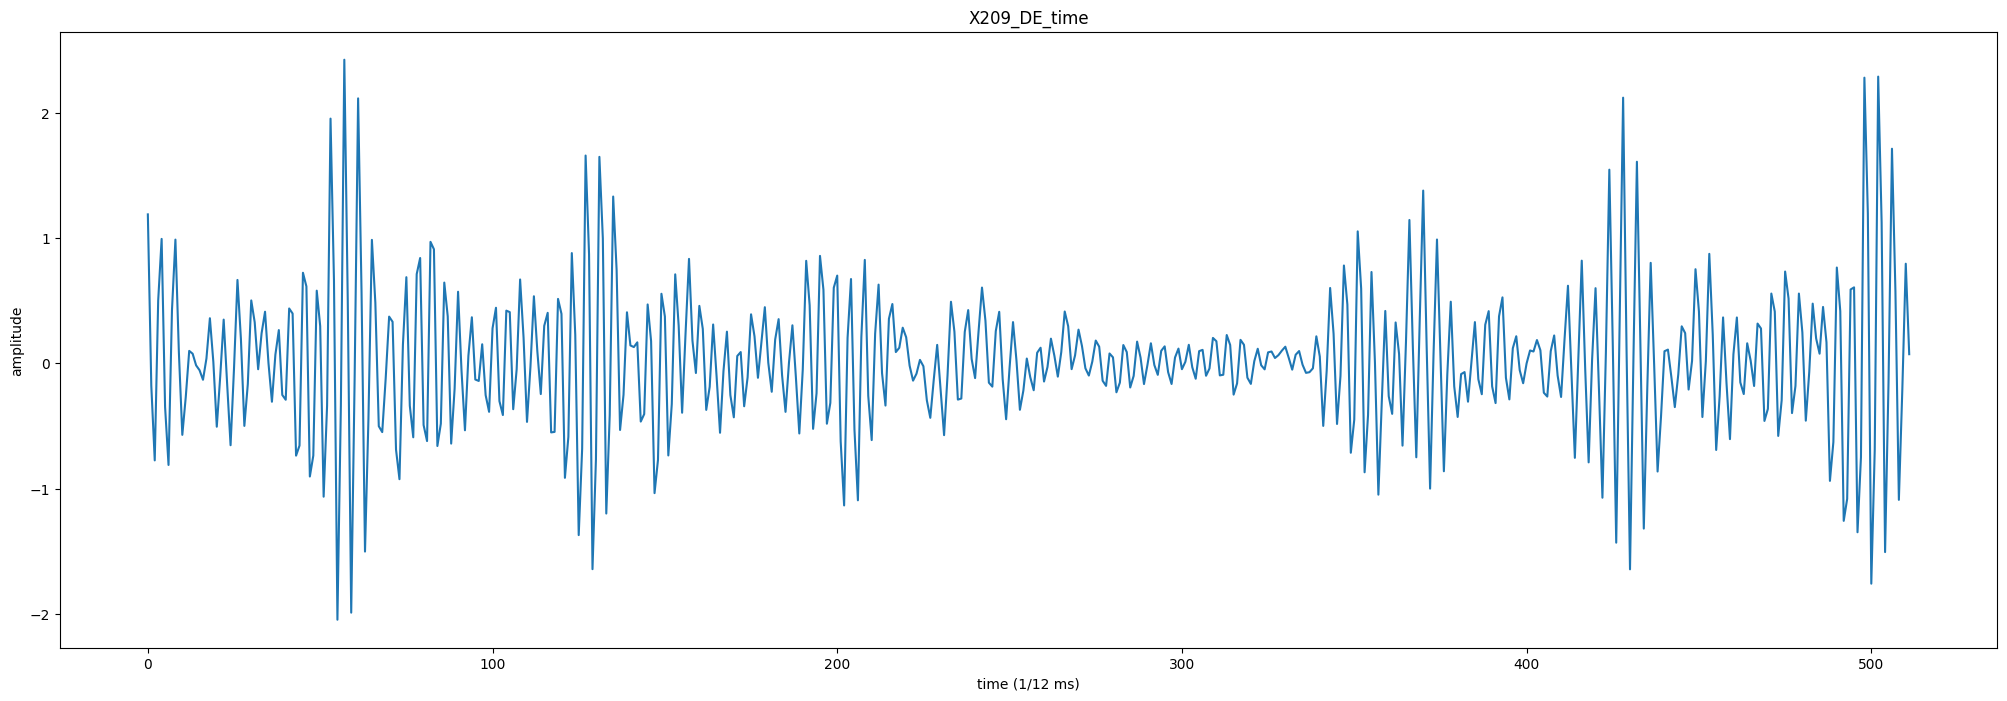

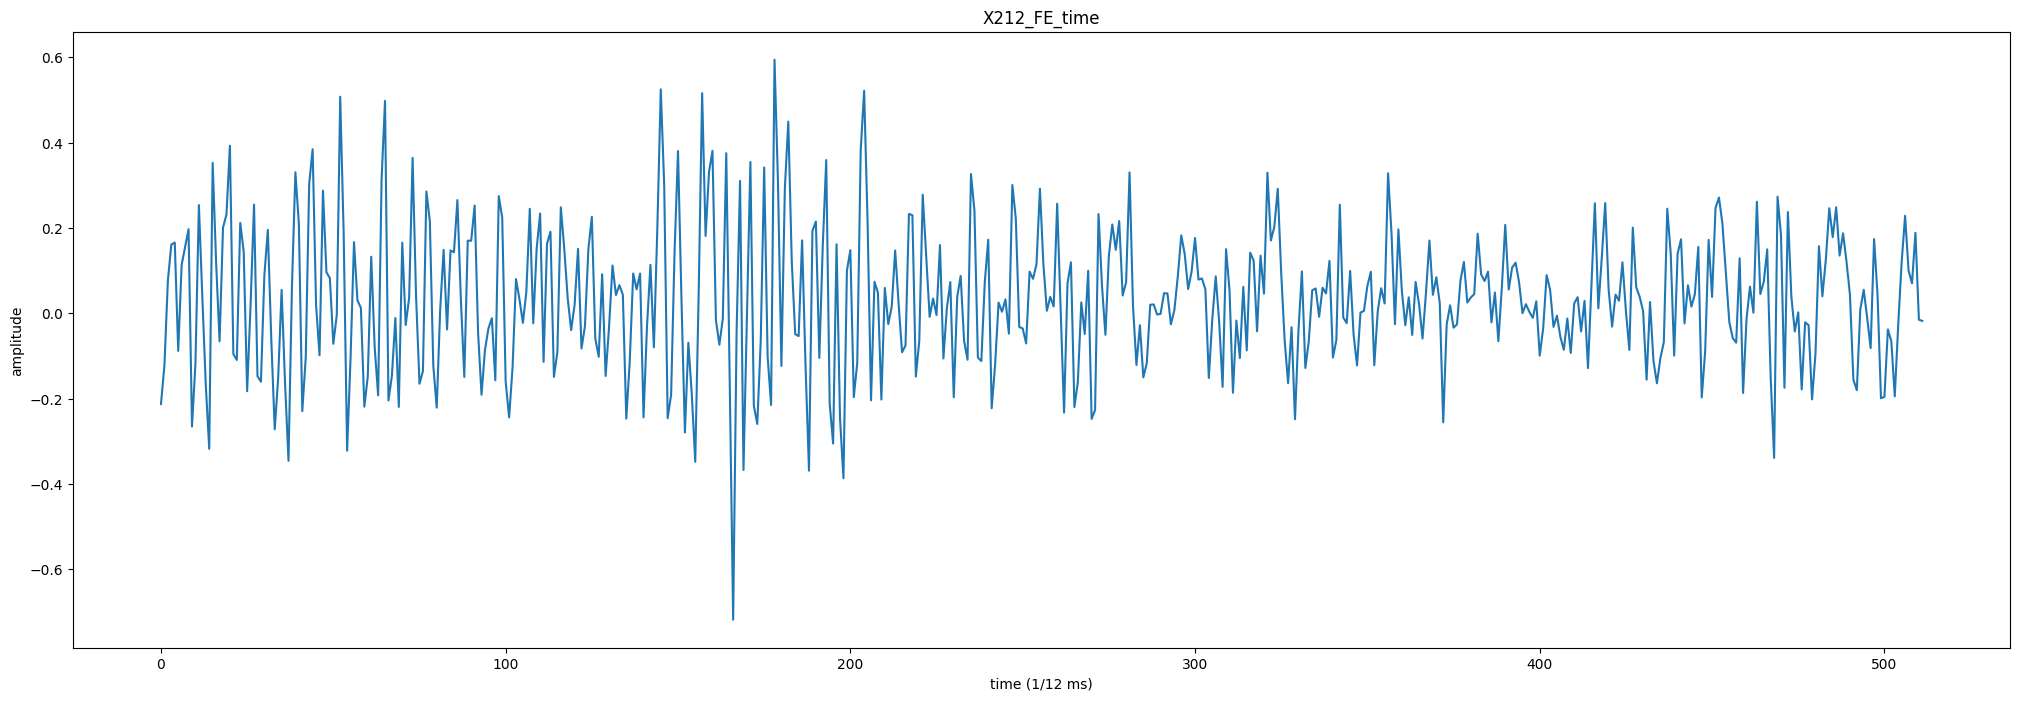

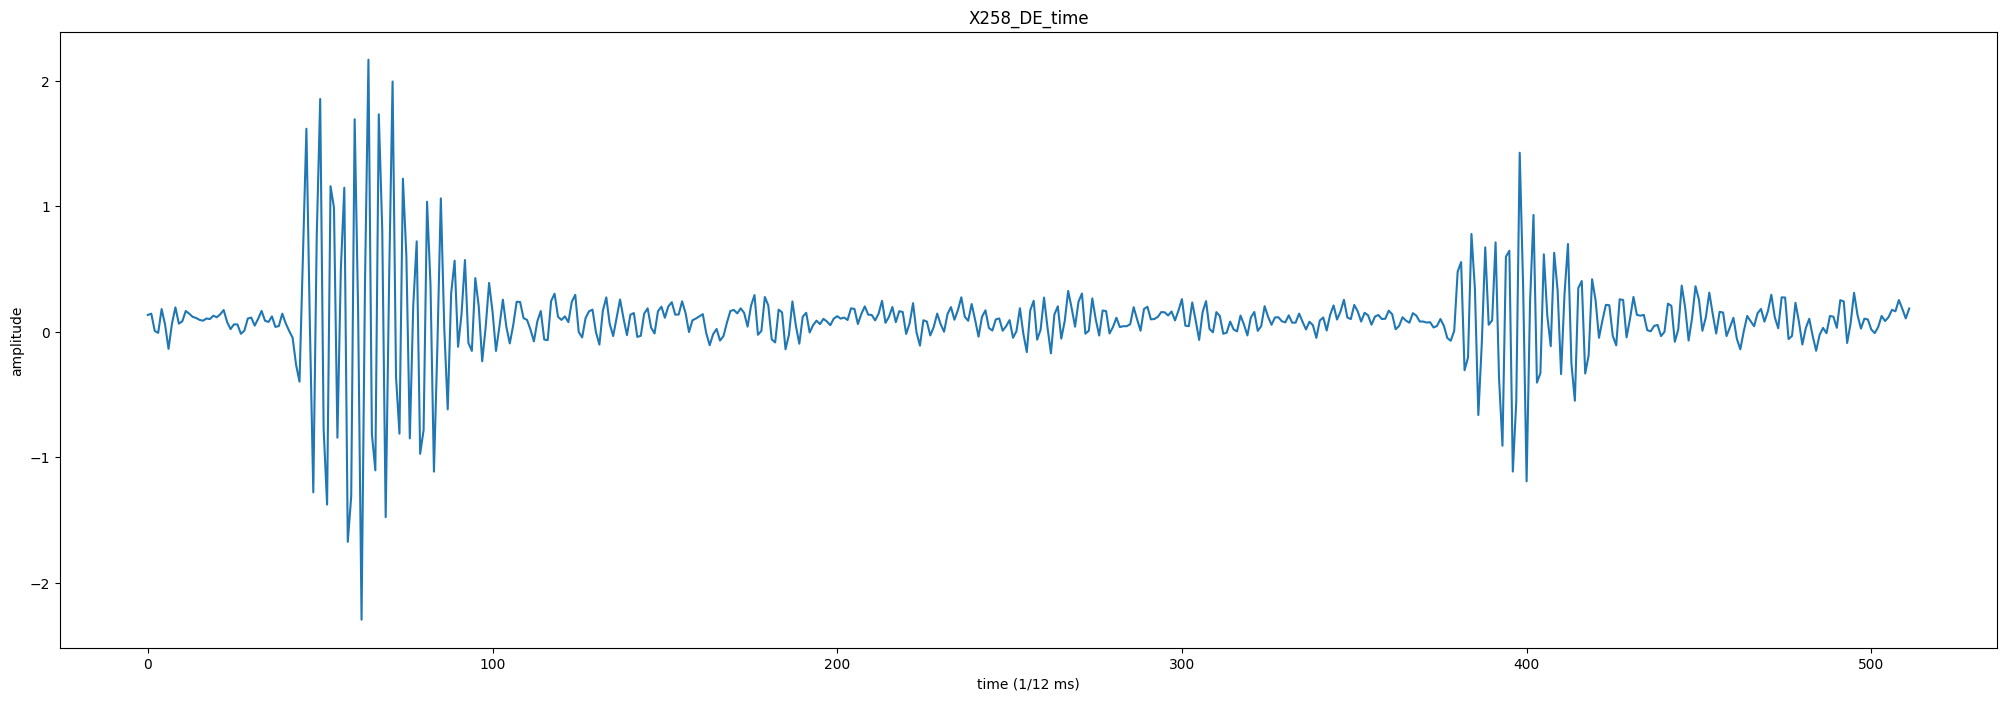

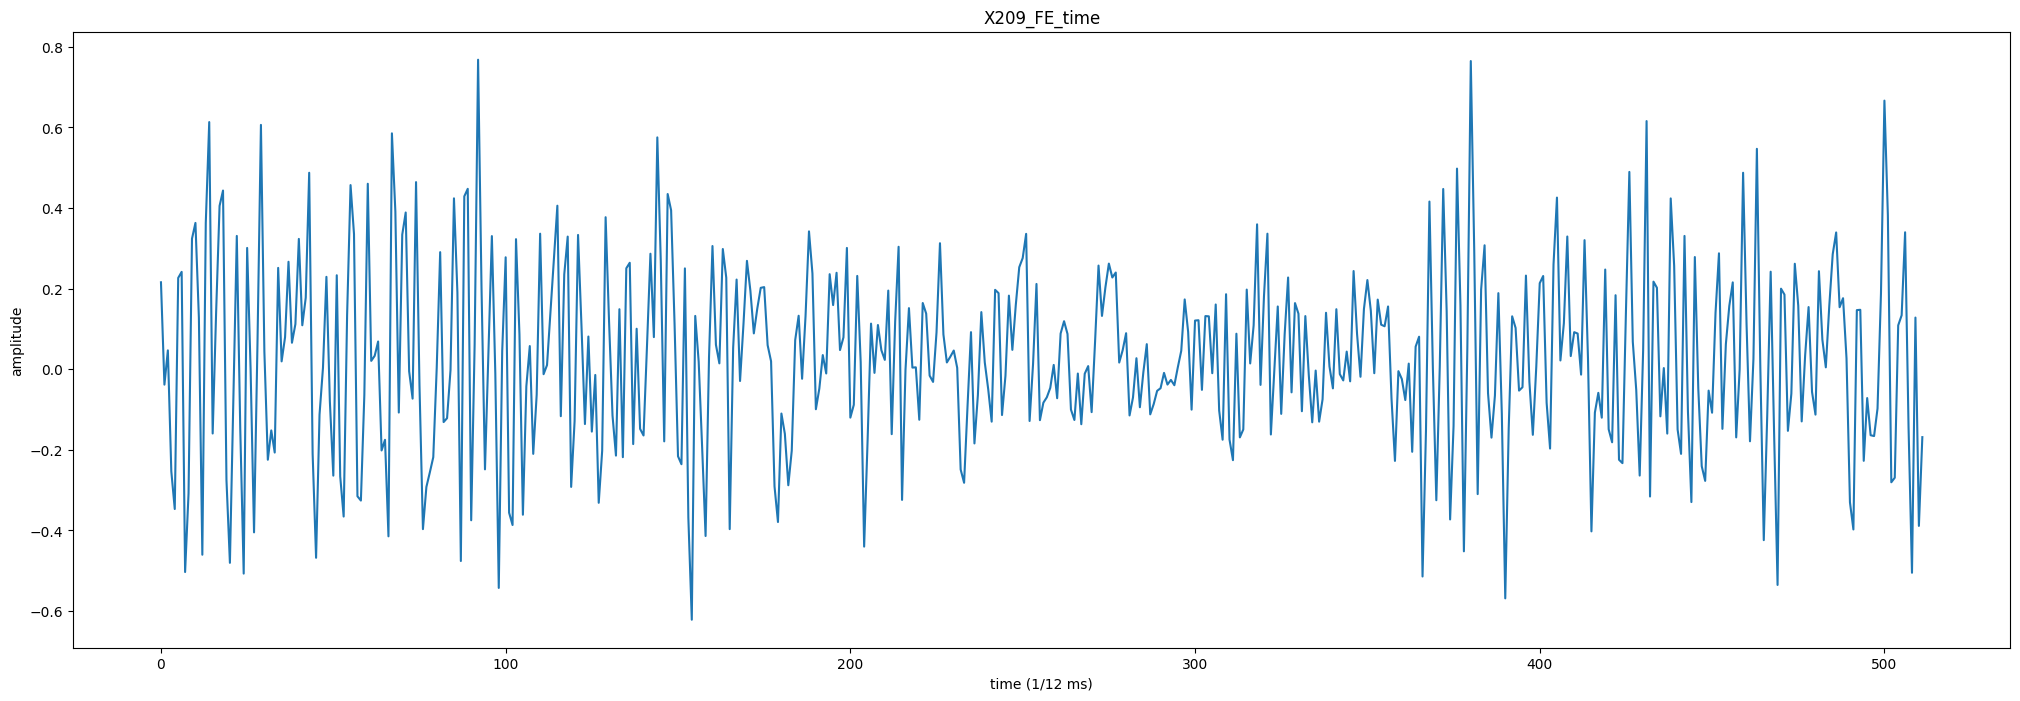

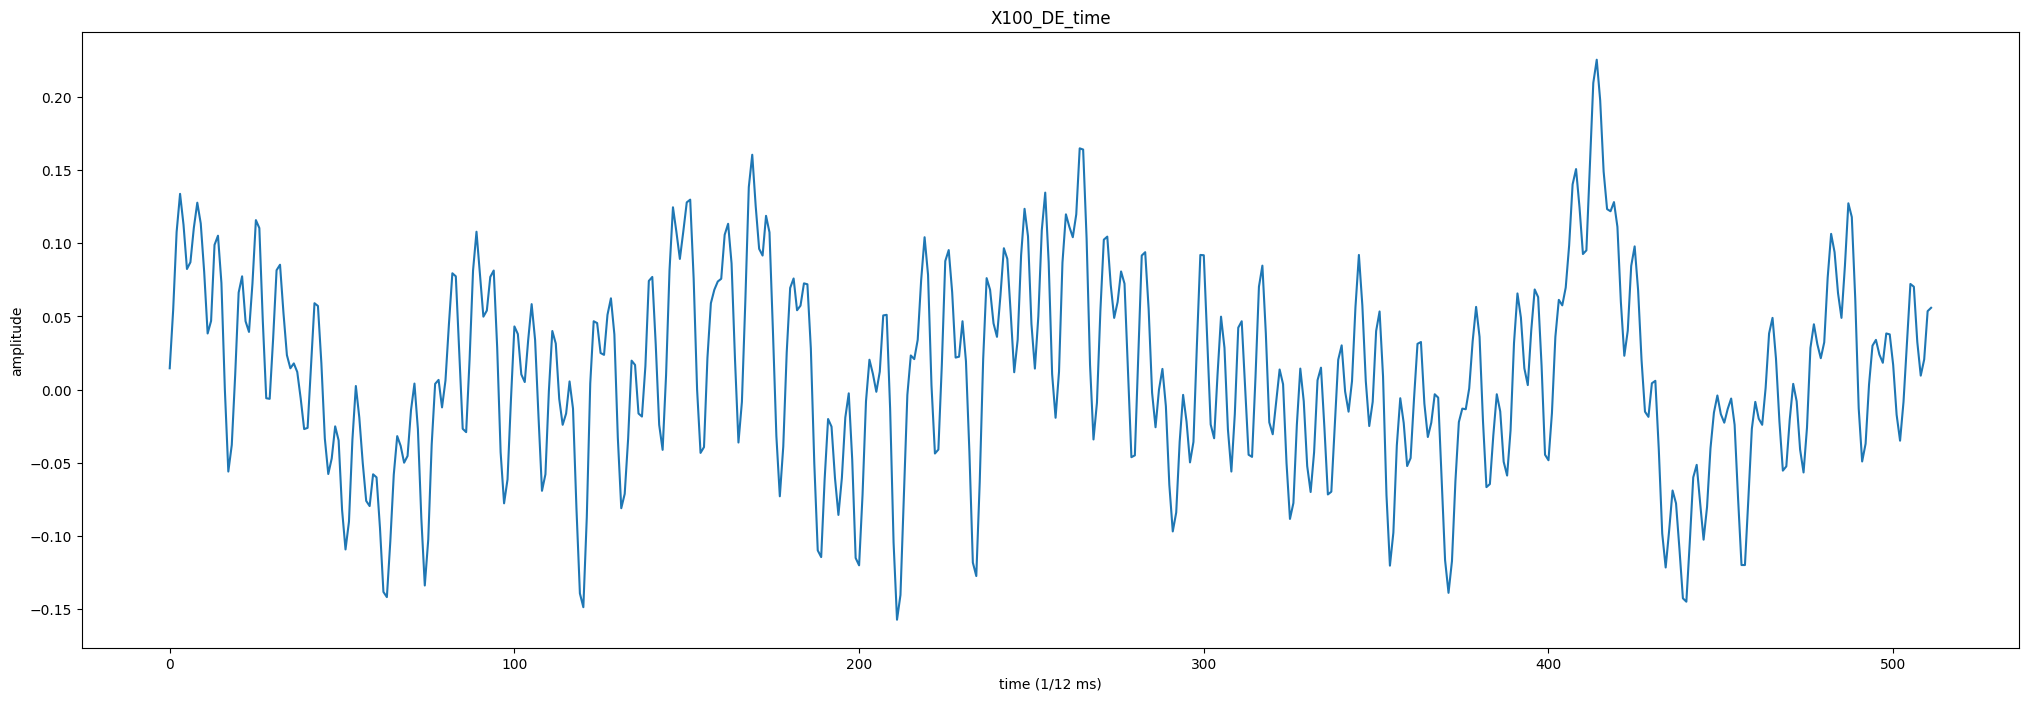

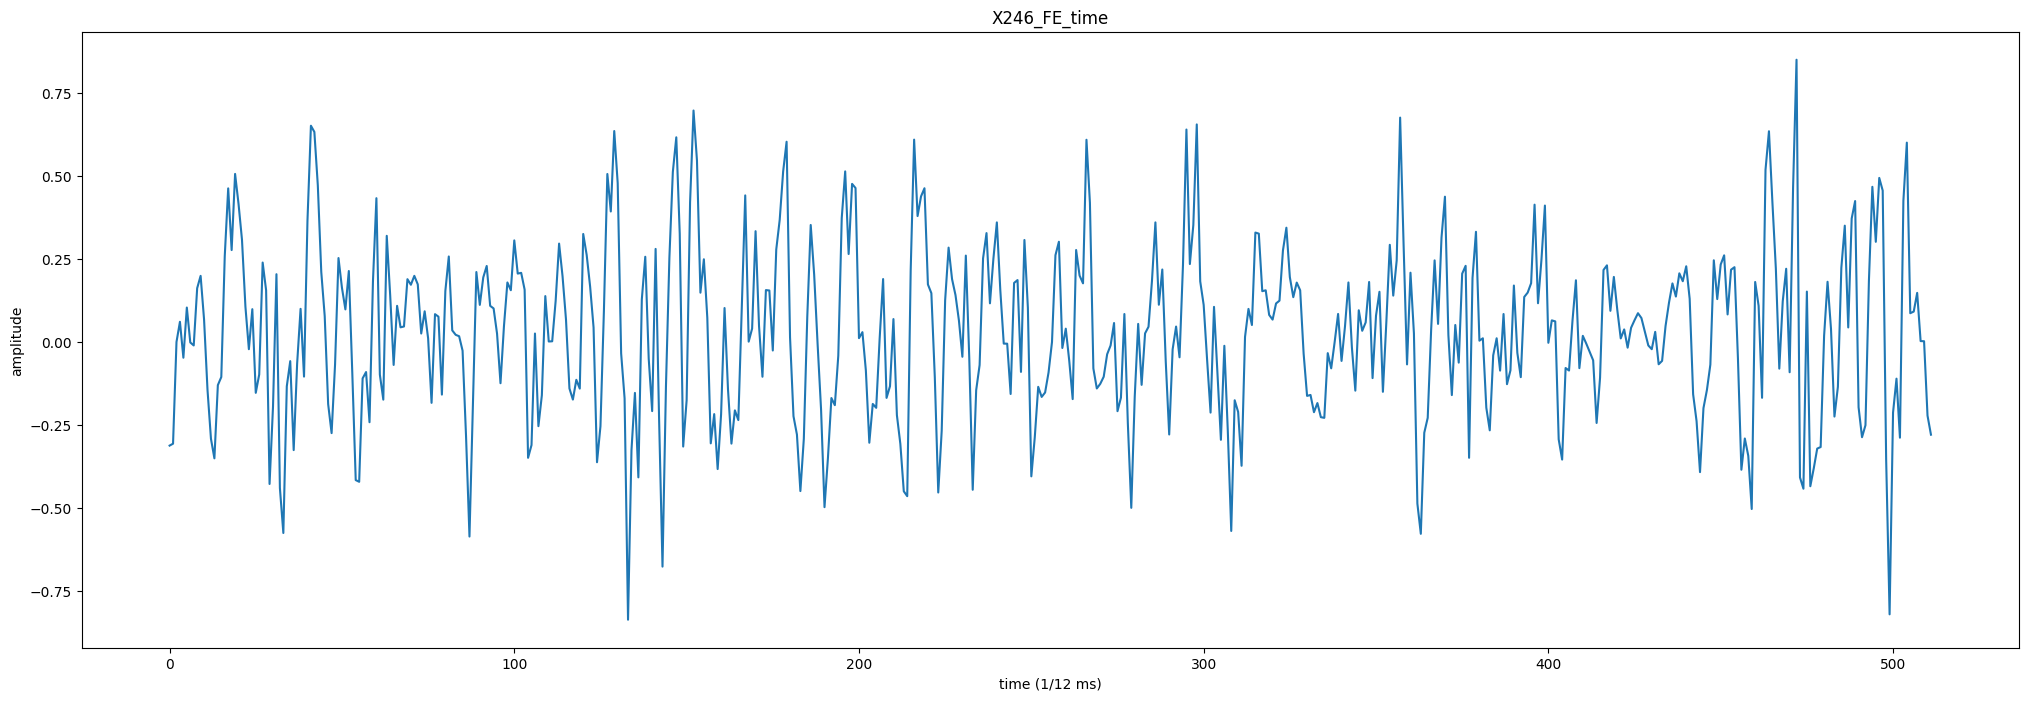

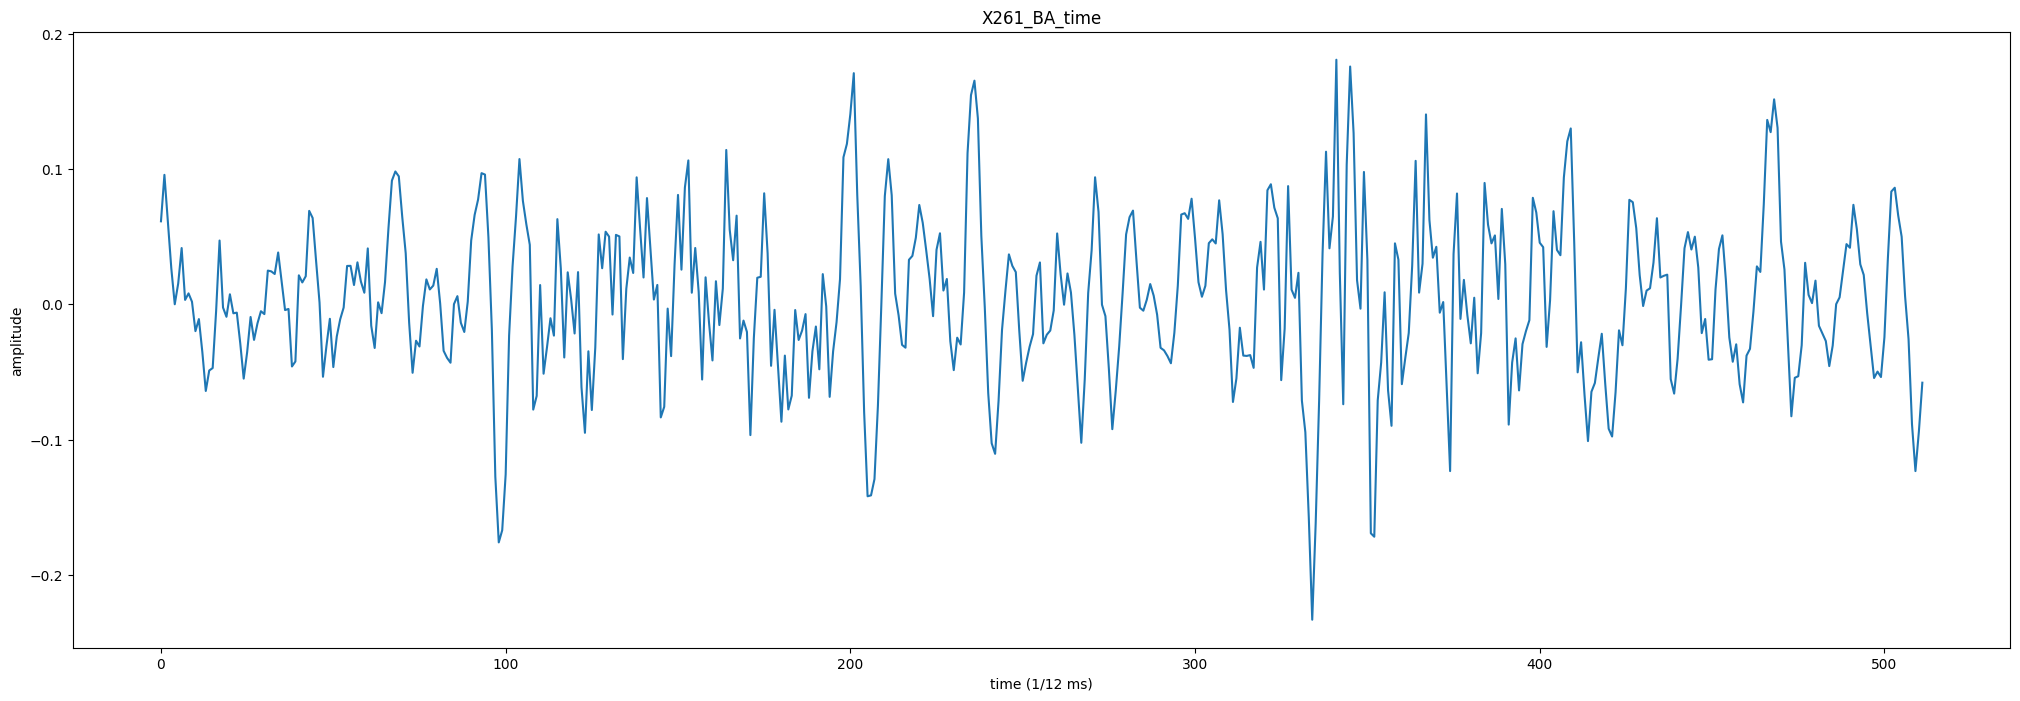

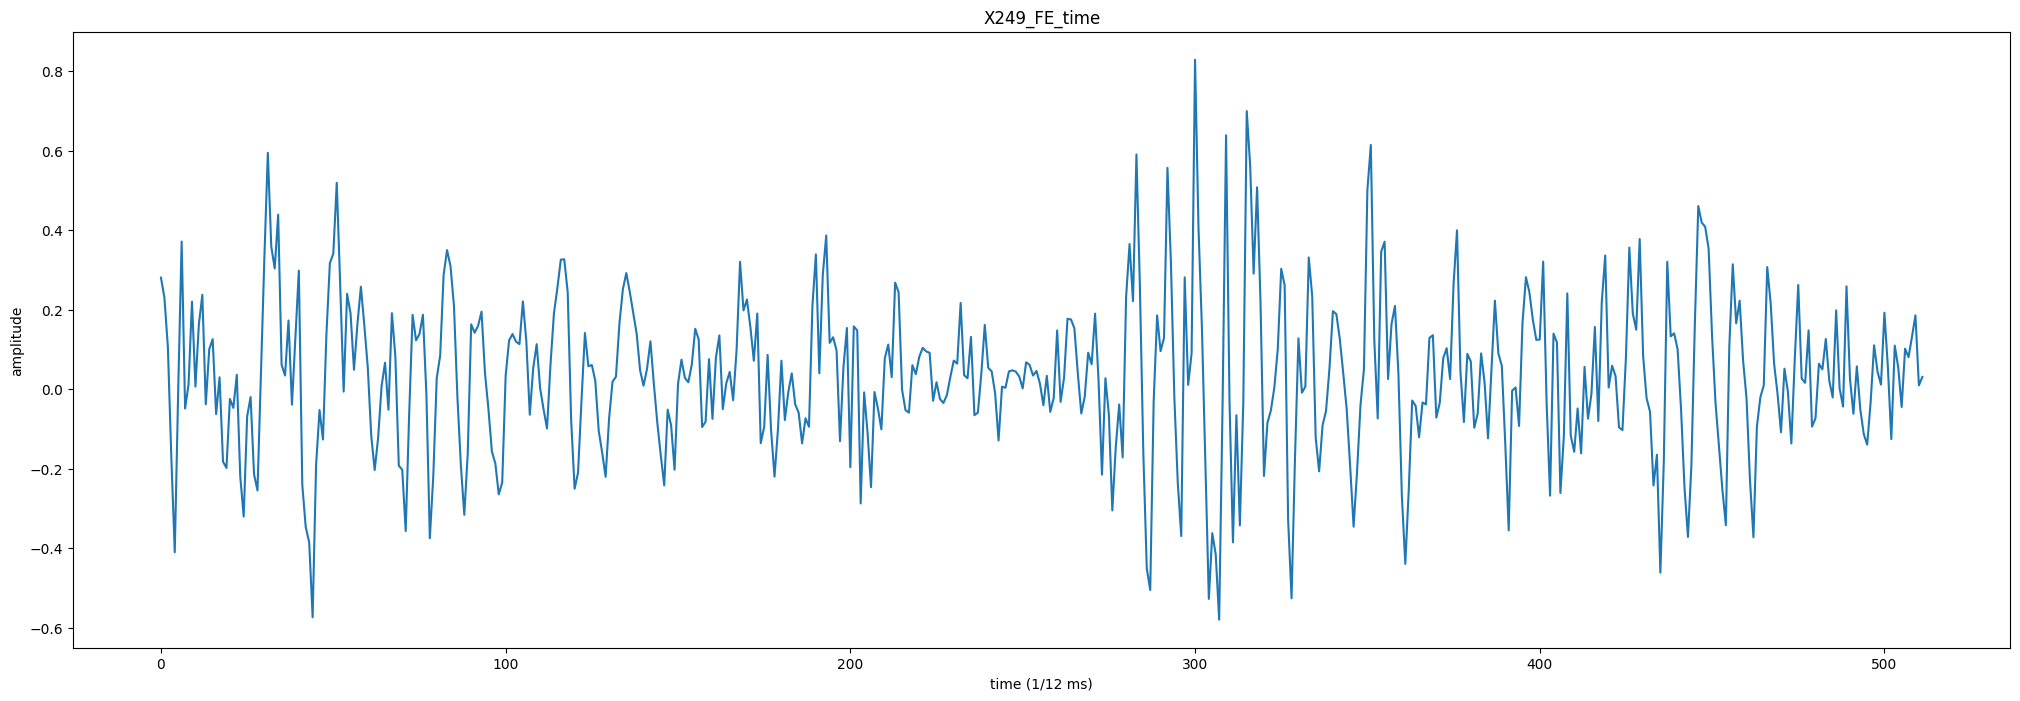

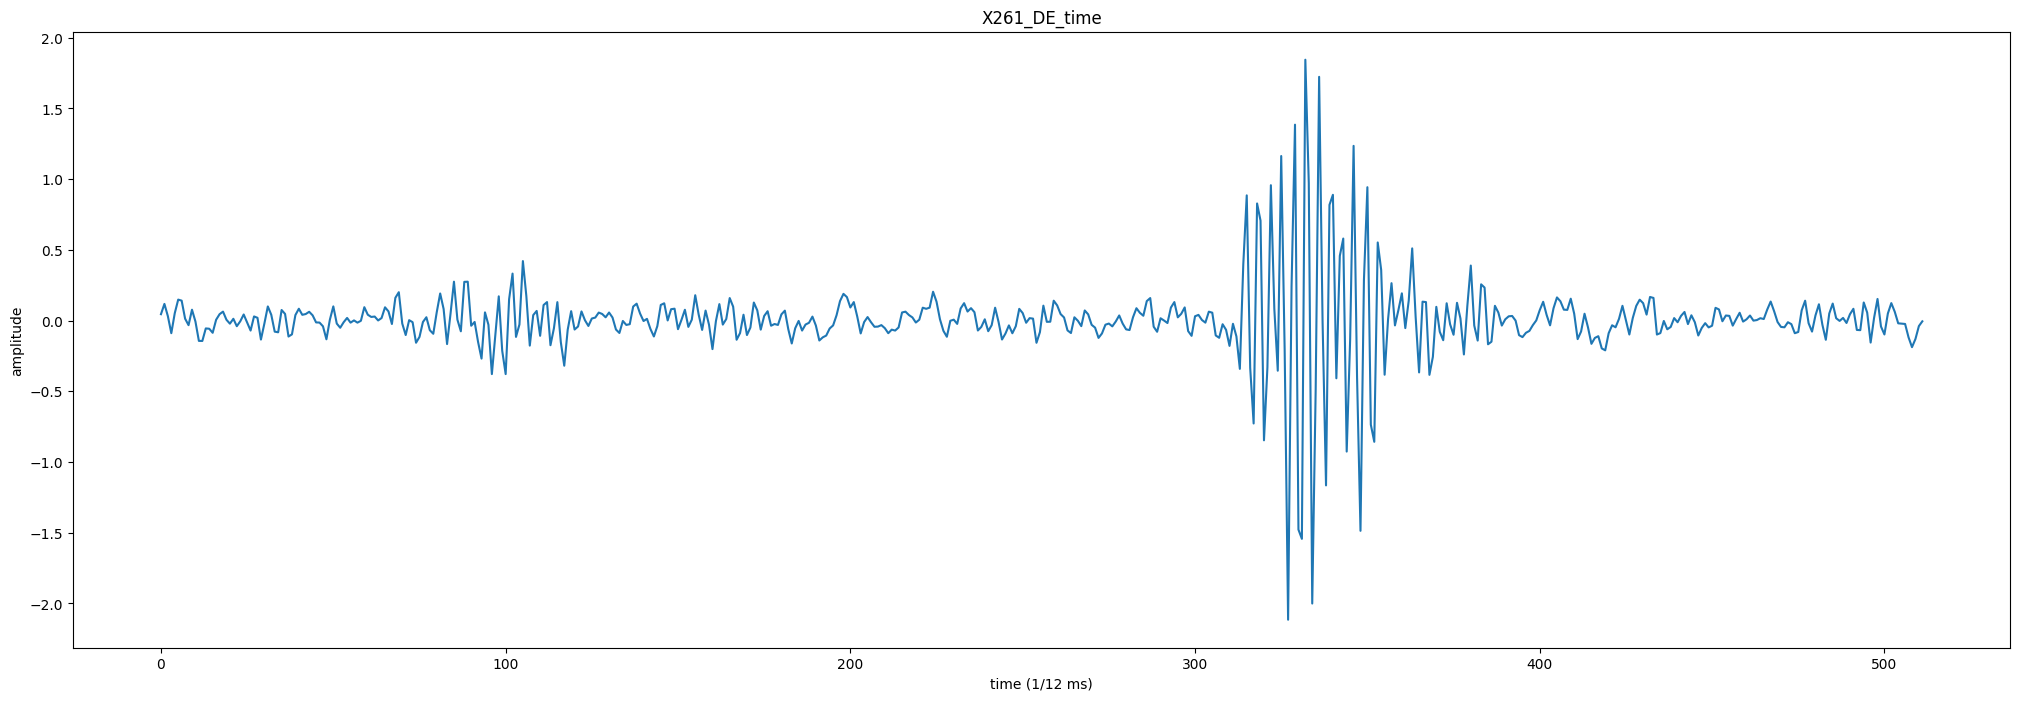

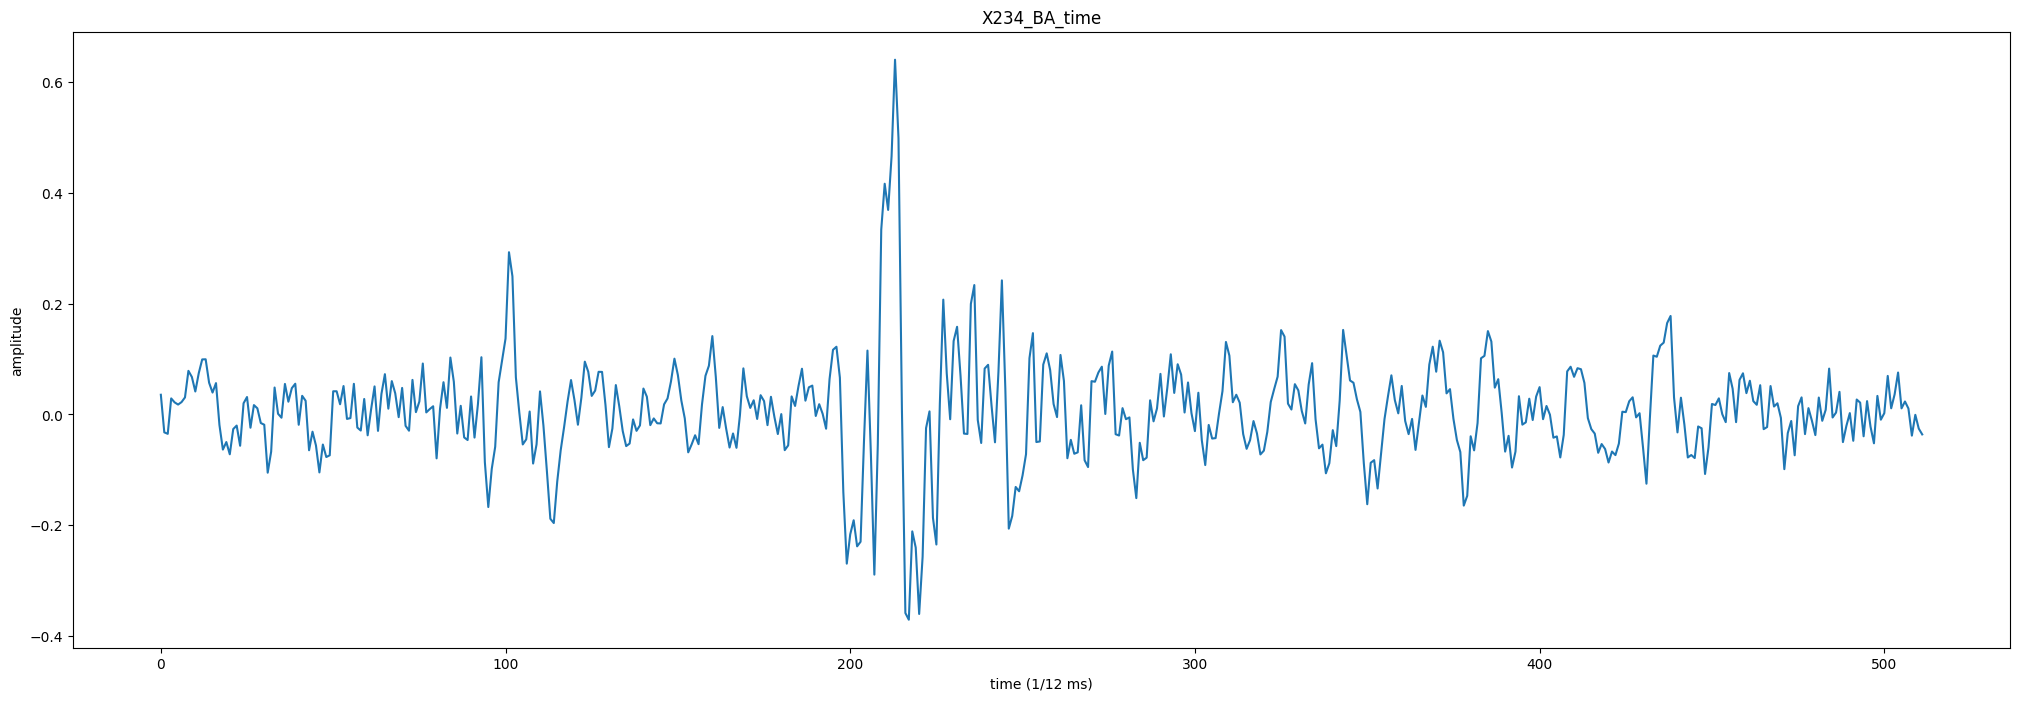

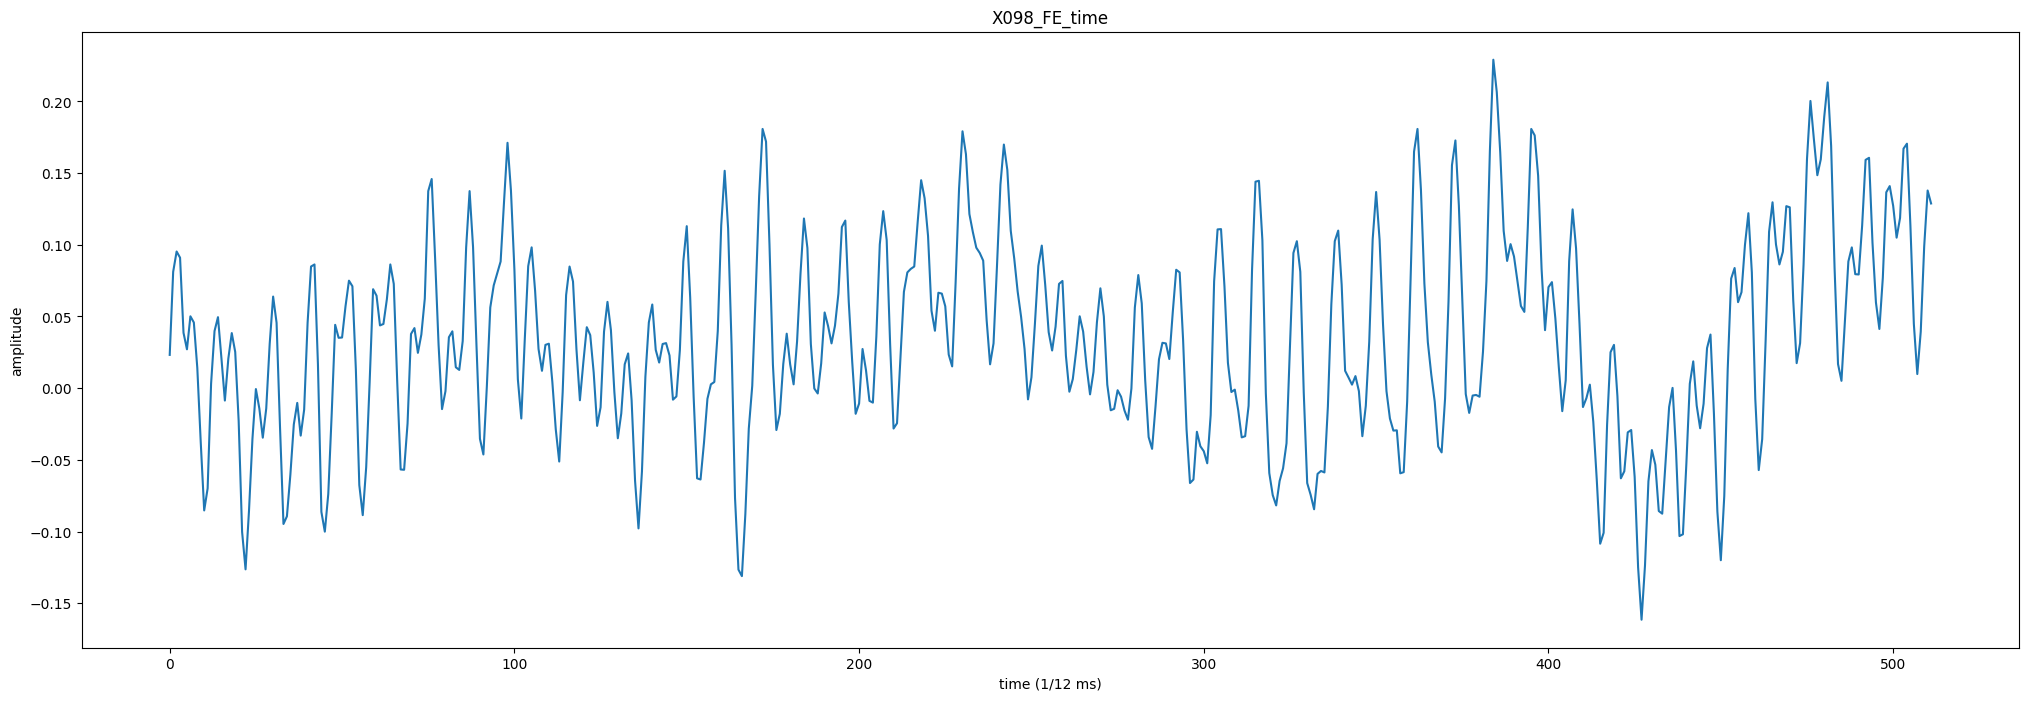

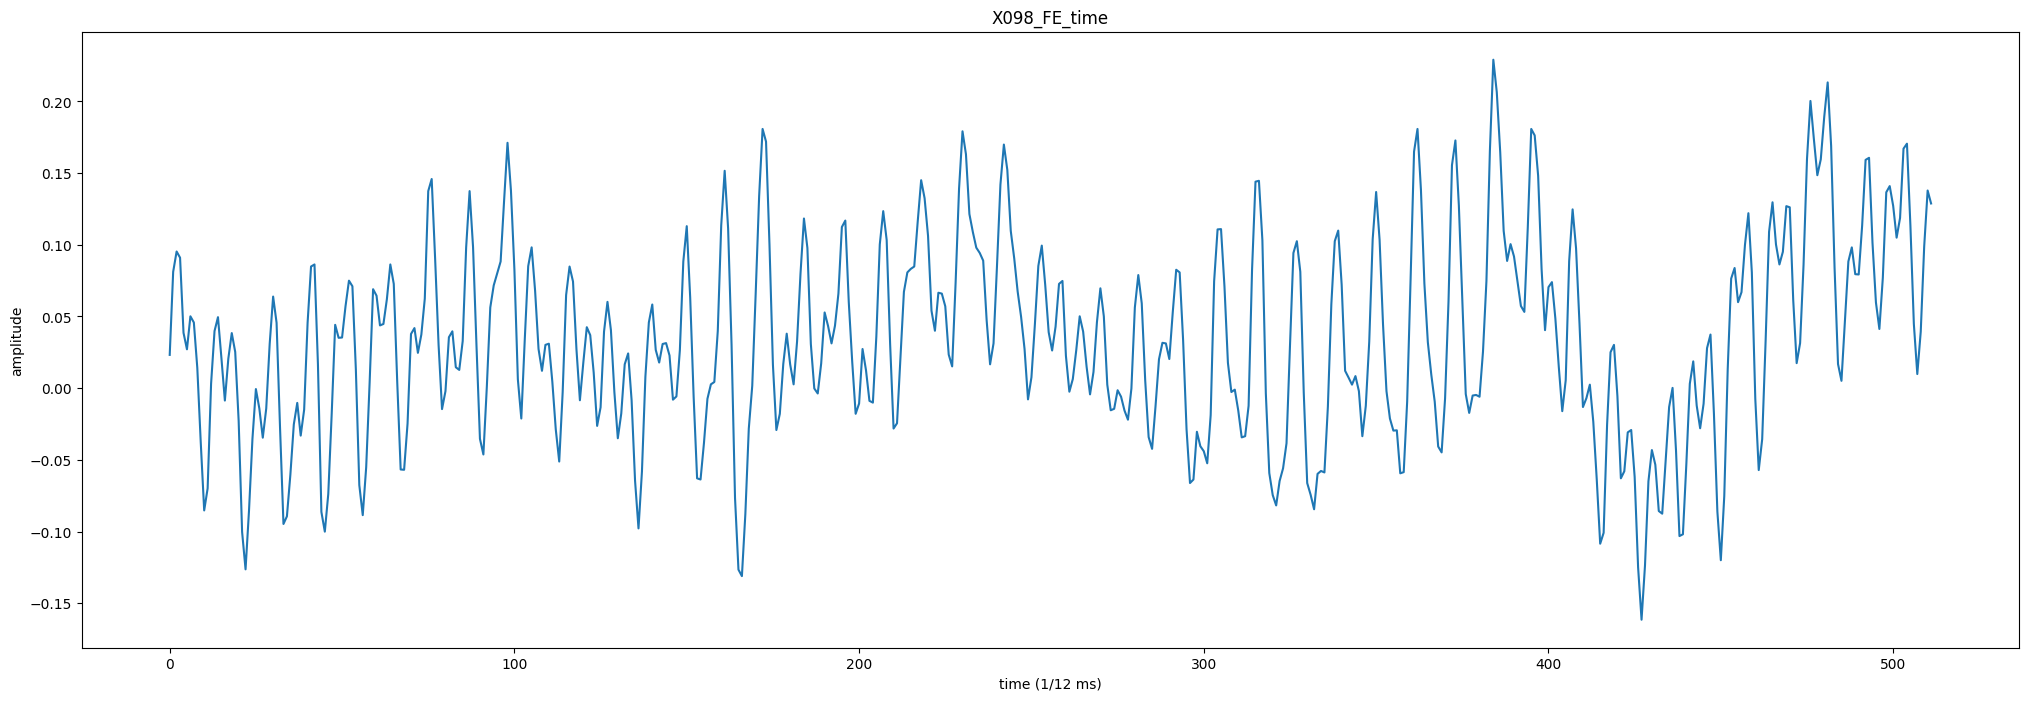

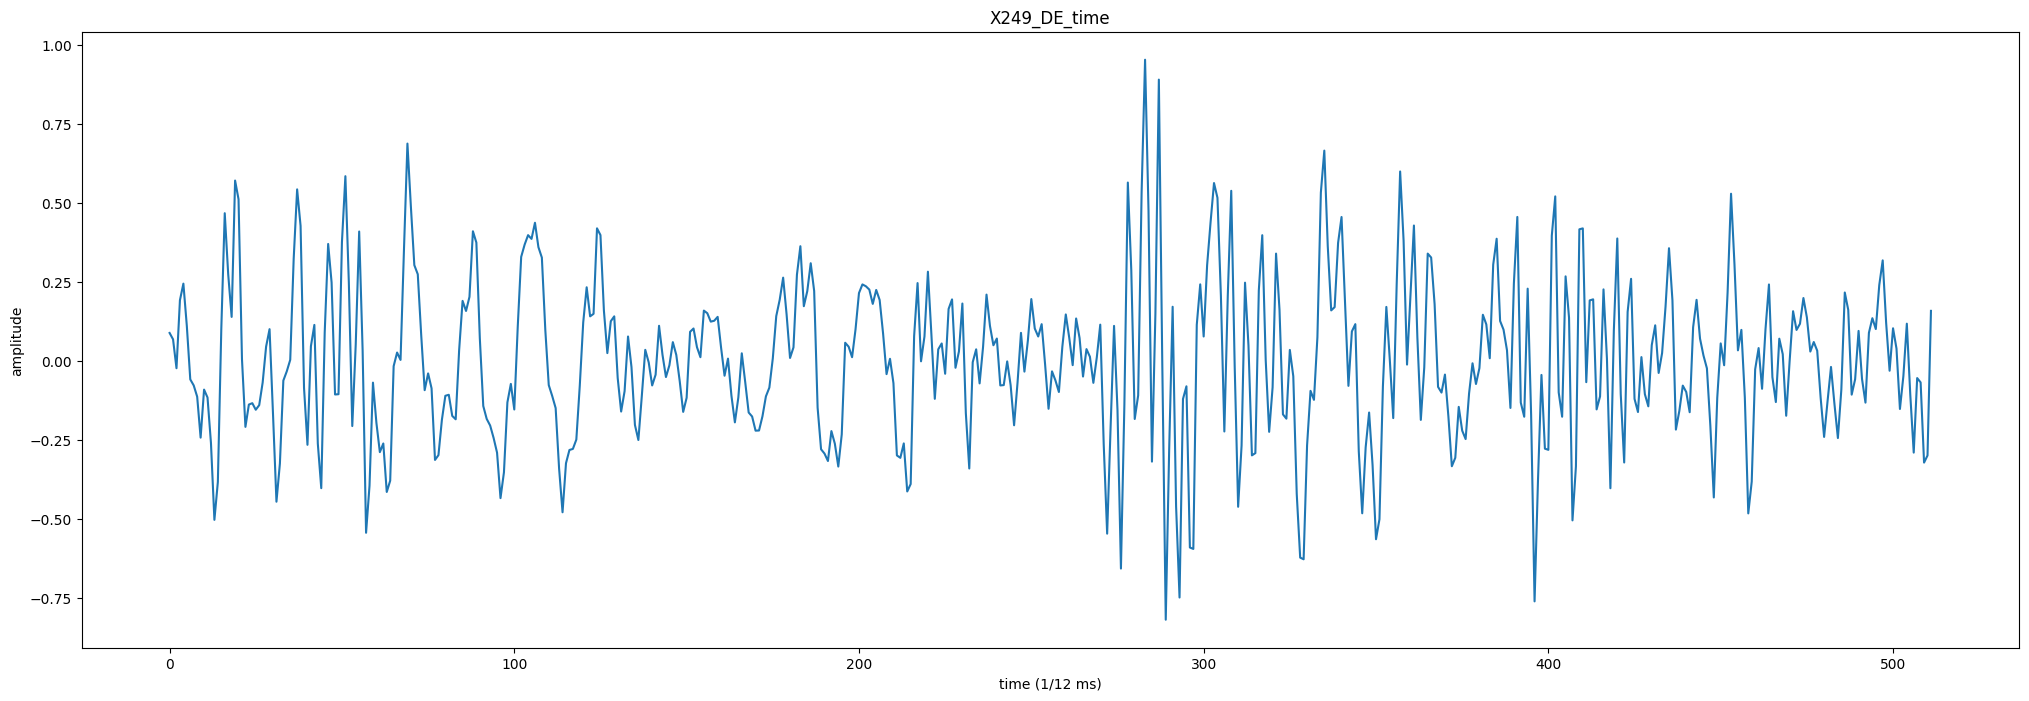

In [116]:
# plotting using 12k Drive End Bearing Fault Data with 0.21 inches
plot_sample(sample_12k, 'time (1/12 ms)')